In [36]:
# Cell 1: Setup & Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from scipy import stats
import sklearn
import warnings
warnings.filterwarnings('ignore')

# Plot settings
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
sns.set_palette("husl")

# Load cleaned data
df = pd.read_csv('cleaned_data2/karachi_cleaned2.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values('timestamp').reset_index(drop=True)

print("✅ Data loaded!")
print(f"📊 Shape: {df.shape}")
print(f"📅 Date range: {df['timestamp'].min()} to {df['timestamp'].max()}")
print(f"\n📋 Columns:\n{df.columns.tolist()}")
print(f"\n📋 Data Types:\n{df.dtypes}")
print(f"\n📋 First 5 rows:")
df.head()

✅ Data loaded!
📊 Shape: (4200, 39)
📅 Date range: 2025-08-09 19:00:00 to 2026-02-02 18:00:00

📋 Columns:
['timestamp', 'city', 'aqi', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co', 'hour', 'day_of_week', 'month', 'day', 'is_weekend', 'season', 'is_rush_hour', 'aqi_lag_1h', 'aqi_lag_3h', 'aqi_lag_6h', 'aqi_lag_12h', 'aqi_lag_24h', 'aqi_change_1h', 'aqi_change_24h', 'aqi_change_rate_1h', 'aqi_change_rate_24h', 'aqi_rolling_mean_3h', 'aqi_rolling_mean_6h', 'aqi_rolling_mean_12h', 'aqi_rolling_mean_24h', 'aqi_rolling_std_24h', 'aqi_rolling_min_24h', 'aqi_rolling_max_24h', 'pm25_lag_24h', 'pm25_change_24h', 'pm25_rolling_mean_24h', 'is_aqi_rising', 'target_aqi_1d', 'target_aqi_2d', 'target_aqi_3d']

📋 Data Types:
timestamp                datetime64[us]
city                                str
aqi                             float64
pm25                            float64
pm10                            float64
o3                              float64
no2                             float64
so2     

,timestamp,city,aqi,pm25,pm10,o3,no2,so2,co,hour,...,aqi_rolling_std_24h,aqi_rolling_min_24h,aqi_rolling_max_24h,pm25_lag_24h,pm25_change_24h,pm25_rolling_mean_24h,is_aqi_rising,target_aqi_1d,target_aqi_2d,target_aqi_3d
0,2025-08-09 19:00:00,karachi,53.0,12.83,62.90,37.95,0.06,0.30,72.90,19,...,0.707107,53.0,53.0,12.83,0.0,12.830000,0,51.0,42.0,54.0
1,2025-08-09 20:00:00,karachi,52.0,12.79,62.97,37.50,0.07,0.30,71.46,20,...,0.707107,52.0,53.0,12.83,0.0,12.810000,0,48.0,40.0,54.0
2,2025-08-09 21:00:00,karachi,51.0,12.31,60.58,37.33,0.07,0.31,70.27,21,...,1.000000,51.0,53.0,12.83,0.0,12.643333,0,45.0,39.0,54.0
3,2025-08-09 22:00:00,karachi,48.0,11.46,55.81,37.49,0.07,0.31,69.84,22,...,2.160247,48.0,53.0,12.83,0.0,12.347500,0,42.0,38.0,54.0
4,2025-08-09 23:00:00,karachi,45.0,10.71,51.12,37.68,0.07,0.31,69.21,23,...,3.271085,45.0,53.0,12.83,0.0,12.020000,0,40.0,40.0,54.0


In [3]:
# Cell 2: Basic Statistics
print("="*60)
print("📊 BASIC STATISTICS")
print("="*60)

# Overview
print(f"\n✅ Total Records: {len(df)}")
print(f"✅ Total Features: {len(df.columns)}")
print(f"✅ Missing Values: {df.isnull().sum().sum()}")
print(f"✅ Duplicate Rows: {df.duplicated().sum()}")

# Key stats
print("\n📈 Key Statistics:")
key_cols = ['aqi', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co']
available = [c for c in key_cols if c in df.columns]
df[available].describe().round(2)

📊 BASIC STATISTICS

✅ Total Records: 4200
✅ Total Features: 39
✅ Missing Values: 0
✅ Duplicate Rows: 0

📈 Key Statistics:


,aqi,pm25,pm10,o3,no2,so2,co
count,4200.00,4200.00,4200.00,4200.00,4200.00,4200.00,4200.00
mean,93.56,38.60,83.47,95.83,0.68,3.78,189.53
std,55.74,37.70,62.39,42.83,0.87,4.46,126.10
min,9.00,2.20,5.63,30.14,0.02,0.06,68.22
25%,51.00,12.31,36.20,47.17,0.08,0.29,91.66
50%,76.00,24.04,72.34,104.79,0.17,0.74,131.42
75%,151.00,55.89,112.07,131.11,1.19,7.26,270.38
max,310.00,262.00,414.47,208.98,6.95,23.33,824.50


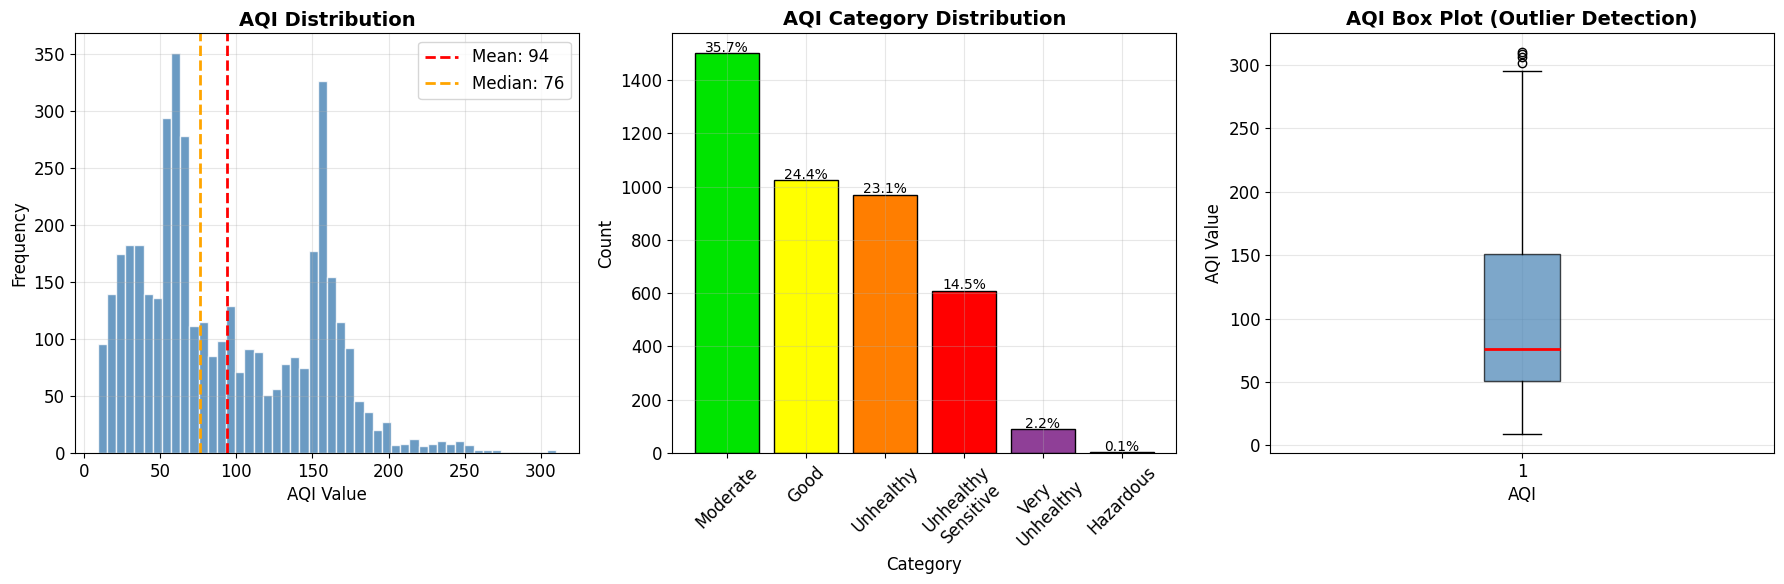


📊 AQI Summary:
  Mean:   93.6
  Median: 76.0
  Std:    55.7
  Min:    9.0
  Max:    310.0

📊 Category Breakdown:
  Moderate: 1500 (35.7%)
  Good: 1025 (24.4%)
  Unhealthy: 970 (23.1%)
  Unhealthy
Sensitive: 610 (14.5%)
  Very
Unhealthy: 91 (2.2%)
  Hazardous: 4 (0.1%)


In [4]:
# Cell 4: AQI Distribution Analysis
import os
os.makedirs('eda_plots', exist_ok=True)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histogram
axes[0].hist(df['aqi'], bins=50, color='steelblue', 
             edgecolor='white', alpha=0.8)
axes[0].axvline(df['aqi'].mean(), color='red', 
                linestyle='--', linewidth=2, label=f"Mean: {df['aqi'].mean():.0f}")
axes[0].axvline(df['aqi'].median(), color='orange', 
                linestyle='--', linewidth=2, label=f"Median: {df['aqi'].median():.0f}")
axes[0].set_title('AQI Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('AQI Value')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# AQI Category Distribution
aqi_categories = pd.cut(df['aqi'],
    bins=[0, 50, 100, 150, 200, 300, 500],
    labels=['Good', 'Moderate', 'Unhealthy\nSensitive', 
            'Unhealthy', 'Very\nUnhealthy', 'Hazardous'])

category_counts = aqi_categories.value_counts()
colors = ['#00e400', '#ffff00', '#ff7e00', '#ff0000', '#8f3f97', '#7e0023']

axes[1].bar(category_counts.index, category_counts.values, 
            color=colors[:len(category_counts)], edgecolor='black')
axes[1].set_title('AQI Category Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

for i, val in enumerate(category_counts.values):
    pct = val / len(df) * 100
    axes[1].text(i, val + 5, f'{pct:.1f}%', ha='center', fontsize=10)

# Box plot
axes[2].boxplot(df['aqi'].dropna(), patch_artist=True,
                boxprops=dict(facecolor='steelblue', alpha=0.7),
                medianprops=dict(color='red', linewidth=2))
axes[2].set_title('AQI Box Plot (Outlier Detection)', fontsize=14, fontweight='bold')
axes[2].set_ylabel('AQI Value')
axes[2].set_xlabel('AQI')

plt.tight_layout()
plt.savefig('eda_plots/02_aqi_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n📊 AQI Summary:")
print(f"  Mean:   {df['aqi'].mean():.1f}")
print(f"  Median: {df['aqi'].median():.1f}")
print(f"  Std:    {df['aqi'].std():.1f}")
print(f"  Min:    {df['aqi'].min():.1f}")
print(f"  Max:    {df['aqi'].max():.1f}")
print(f"\n📊 Category Breakdown:")
for cat, count in category_counts.items():
    print(f"  {cat}: {count} ({count/len(df)*100:.1f}%)")

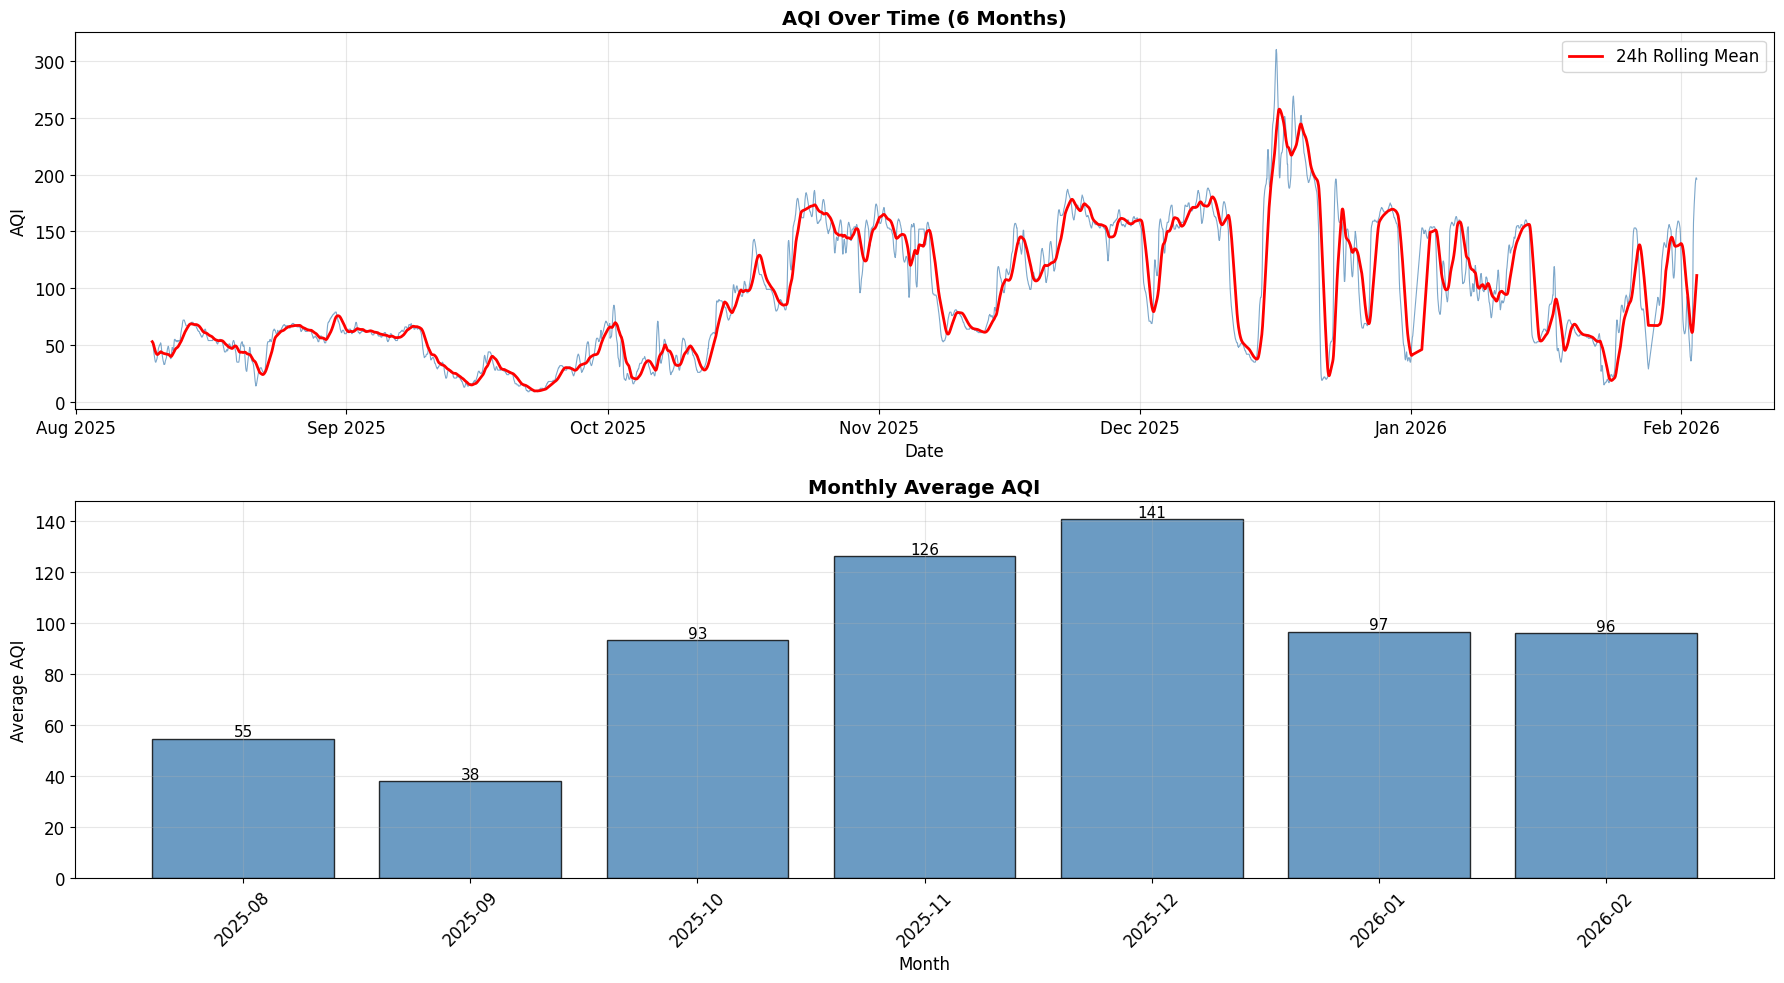

✅ Plot saved!


In [5]:
# Cell 5: AQI Over Time (Temporal Patterns)
fig, axes = plt.subplots(2, 1, figsize=(18, 10))

# Full time series
axes[0].plot(df['timestamp'], df['aqi'], 
             color='steelblue', linewidth=0.8, alpha=0.7)

# 24h rolling mean
rolling_mean = df['aqi'].rolling(window=24, min_periods=1).mean()
axes[0].plot(df['timestamp'], rolling_mean,
             color='red', linewidth=2, label='24h Rolling Mean')

axes[0].set_title('AQI Over Time (6 Months)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('AQI')
axes[0].legend()
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Monthly average
df['month_year'] = df['timestamp'].dt.to_period('M')
monthly_avg = df.groupby('month_year')['aqi'].mean()

axes[1].bar(range(len(monthly_avg)), monthly_avg.values,
            color='steelblue', edgecolor='black', alpha=0.8)
axes[1].set_xticks(range(len(monthly_avg)))
axes[1].set_xticklabels([str(m) for m in monthly_avg.index], rotation=45)
axes[1].set_title('Monthly Average AQI', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Average AQI')

for i, val in enumerate(monthly_avg.values):
    axes[1].text(i, val + 1, f'{val:.0f}', ha='center', fontsize=11)

plt.tight_layout()
plt.savefig('eda_plots/03_aqi_over_time.png', dpi=150, bbox_inches='tight')
plt.show()
print("✅ Plot saved!")

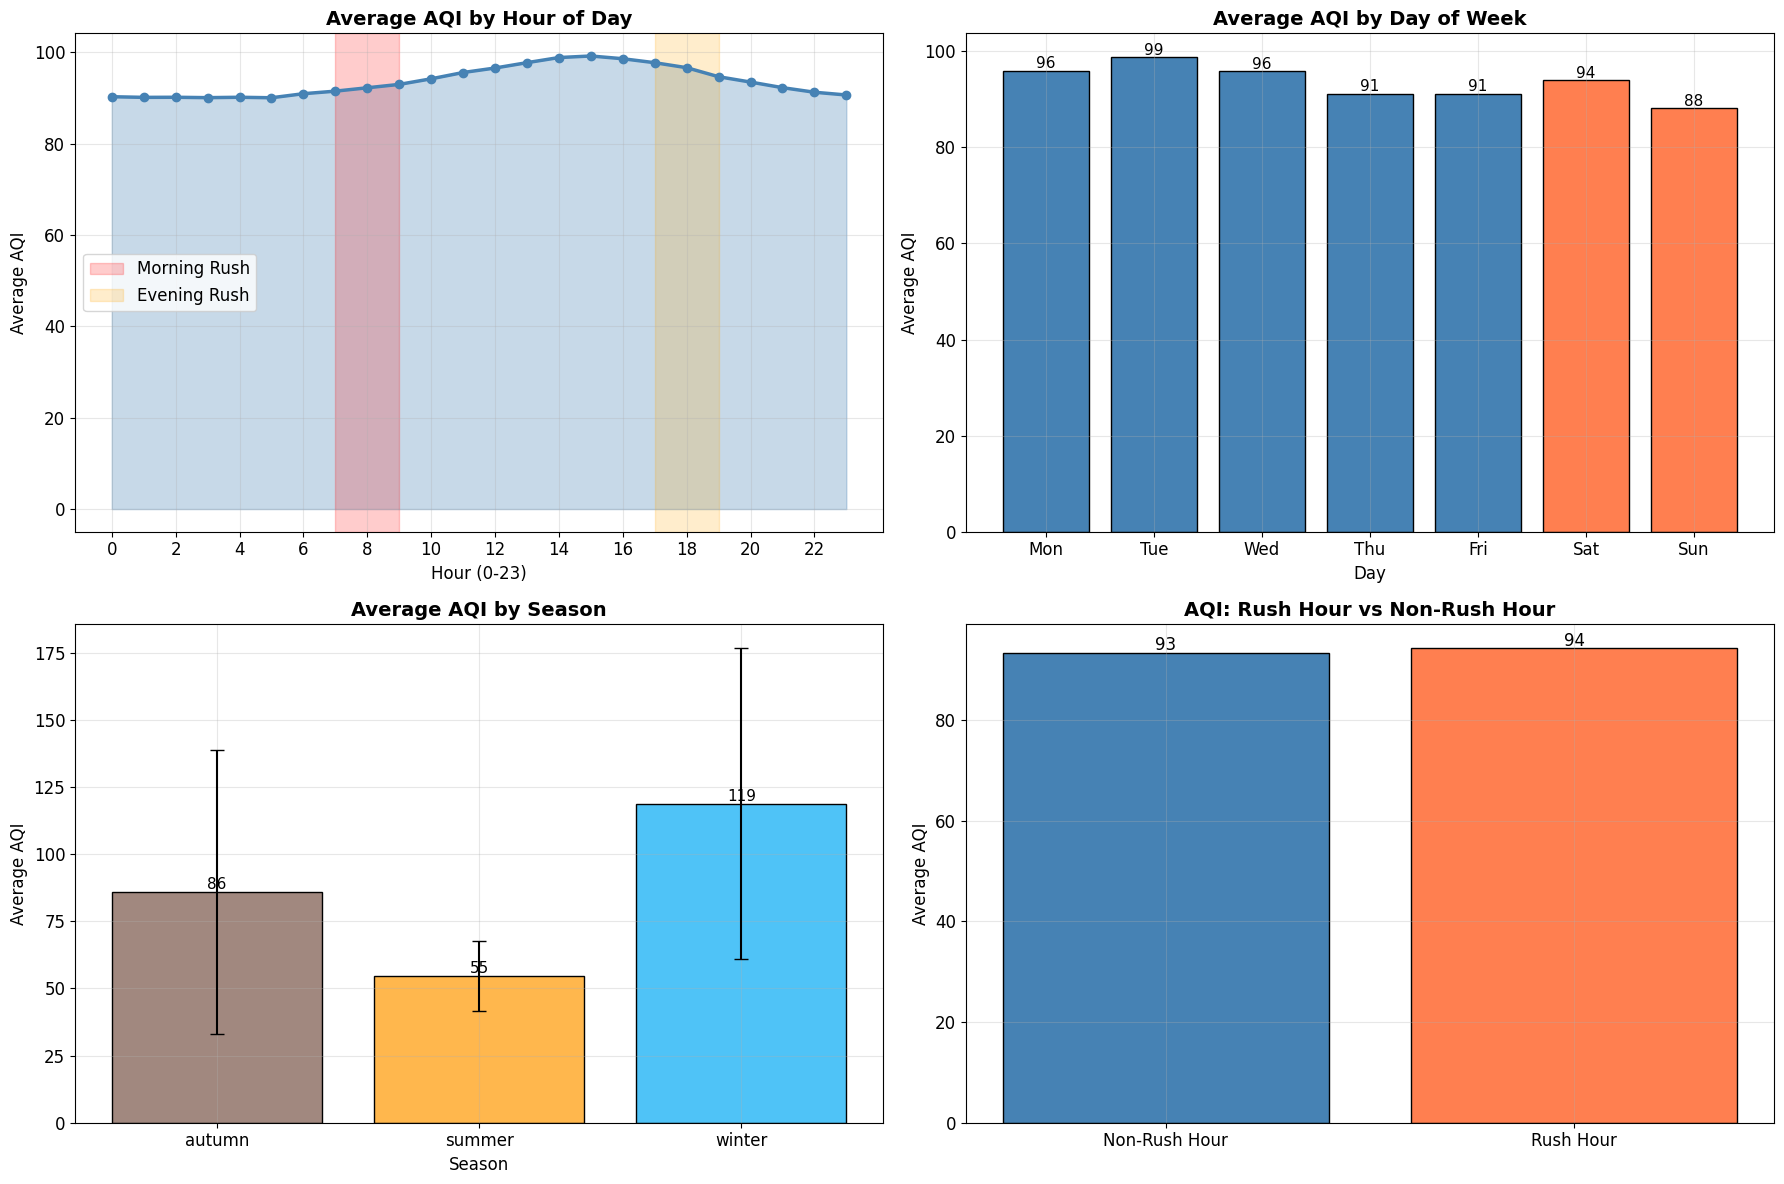

✅ Plot saved!


In [6]:
# Cell 6: Seasonal & Daily Patterns
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Hourly pattern
hourly_avg = df.groupby('hour')['aqi'].mean()
axes[0, 0].plot(hourly_avg.index, hourly_avg.values,
                marker='o', color='steelblue', linewidth=2.5)
axes[0, 0].fill_between(hourly_avg.index, hourly_avg.values,
                         alpha=0.3, color='steelblue')
axes[0, 0].axvspan(7, 9, alpha=0.2, color='red', label='Morning Rush')
axes[0, 0].axvspan(17, 19, alpha=0.2, color='orange', label='Evening Rush')
axes[0, 0].set_title('Average AQI by Hour of Day', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Hour (0-23)')
axes[0, 0].set_ylabel('Average AQI')
axes[0, 0].set_xticks(range(0, 24, 2))
axes[0, 0].legend()

# Day of week pattern
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
daily_avg = df.groupby('day_of_week')['aqi'].mean()
colors_day = ['steelblue']*5 + ['coral']*2  # Weekends different color
axes[0, 1].bar(days, daily_avg.values, color=colors_day, edgecolor='black')
axes[0, 1].set_title('Average AQI by Day of Week', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Day')
axes[0, 1].set_ylabel('Average AQI')
for i, val in enumerate(daily_avg.values):
    axes[0, 1].text(i, val + 0.5, f'{val:.0f}', ha='center', fontsize=11)

# Season pattern
season_avg = df.groupby('season')['aqi'].agg(['mean', 'std']).reset_index()
season_colors = {'winter': '#4fc3f7', 'spring': '#81c784',
                 'summer': '#ffb74d', 'autumn': '#a1887f'}
bar_colors = [season_colors.get(s, 'steelblue') for s in season_avg['season']]

axes[1, 0].bar(season_avg['season'], season_avg['mean'],
               yerr=season_avg['std'], color=bar_colors,
               edgecolor='black', capsize=5)
axes[1, 0].set_title('Average AQI by Season', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Season')
axes[1, 0].set_ylabel('Average AQI')
for i, row in season_avg.iterrows():
    axes[1, 0].text(i, row['mean'] + 1, f"{row['mean']:.0f}",
                    ha='center', fontsize=11)

# Rush hour vs non-rush hour
if 'is_rush_hour' in df.columns:
    rush_data = df.groupby('is_rush_hour')['aqi'].mean()
    labels = ['Non-Rush Hour', 'Rush Hour']
    colors_rush = ['steelblue', 'coral']
    axes[1, 1].bar(labels, rush_data.values, color=colors_rush, edgecolor='black')
    axes[1, 1].set_title('AQI: Rush Hour vs Non-Rush Hour',
                         fontsize=14, fontweight='bold')
    axes[1, 1].set_ylabel('Average AQI')
    for i, val in enumerate(rush_data.values):
        axes[1, 1].text(i, val + 0.5, f'{val:.0f}', ha='center', fontsize=12)

plt.tight_layout()
plt.savefig('eda_plots/04_seasonal_daily_patterns.png', dpi=150, bbox_inches='tight')
plt.show()
print("✅ Plot saved!")

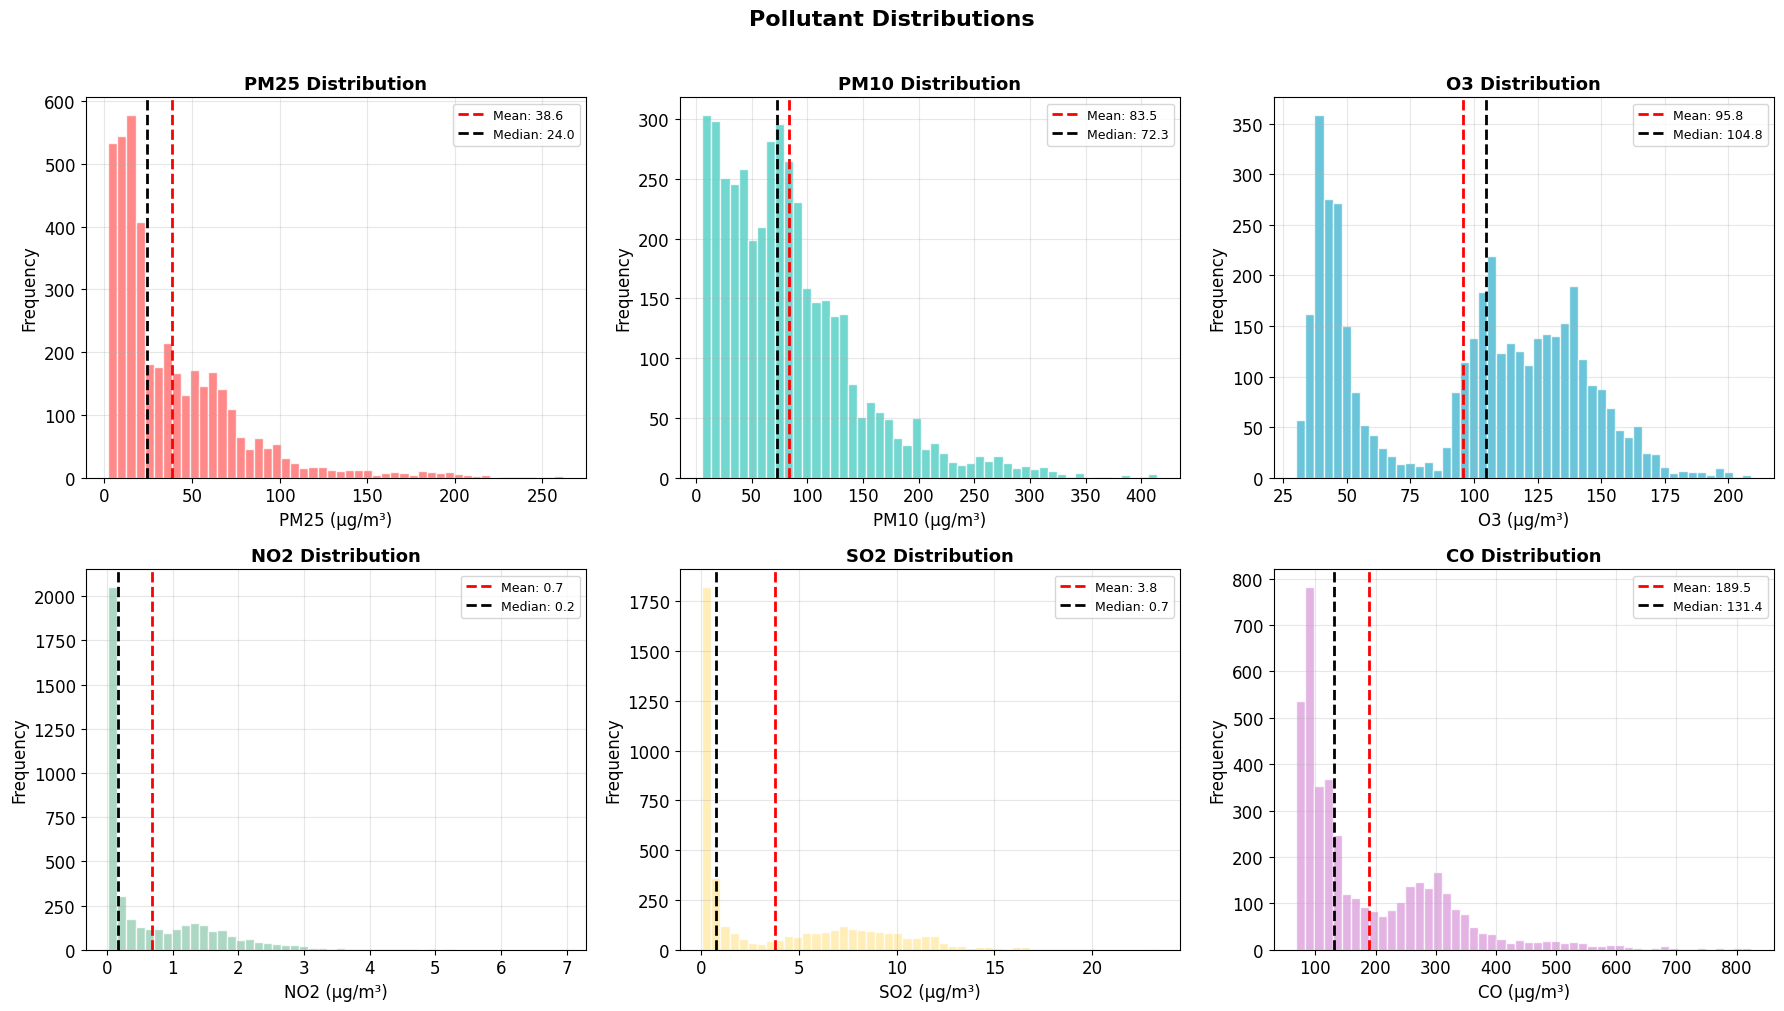

✅ Plot saved!


In [7]:
# Cell 7: All Pollutant Distributions
pollutants = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']
available_pollutants = [p for p in pollutants if p in df.columns]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD']

for i, pollutant in enumerate(available_pollutants):
    ax = axes[i]
    data = df[pollutant].dropna()
    
    ax.hist(data, bins=50, color=colors[i], 
            edgecolor='white', alpha=0.8)
    ax.axvline(data.mean(), color='red', linestyle='--', 
               linewidth=2, label=f'Mean: {data.mean():.1f}')
    ax.axvline(data.median(), color='black', linestyle='--',
               linewidth=2, label=f'Median: {data.median():.1f}')
    
    ax.set_title(f'{pollutant.upper()} Distribution', 
                 fontsize=13, fontweight='bold')
    ax.set_xlabel(f'{pollutant.upper()} (µg/m³)')
    ax.set_ylabel('Frequency')
    ax.legend(fontsize=9)

plt.suptitle('Pollutant Distributions', fontsize=16, fontweight='bold', y=1.01)
plt.tight_layout()
plt.savefig('eda_plots/05_pollutant_distributions.png', dpi=150, bbox_inches='tight')
plt.show()
print("✅ Plot saved!")

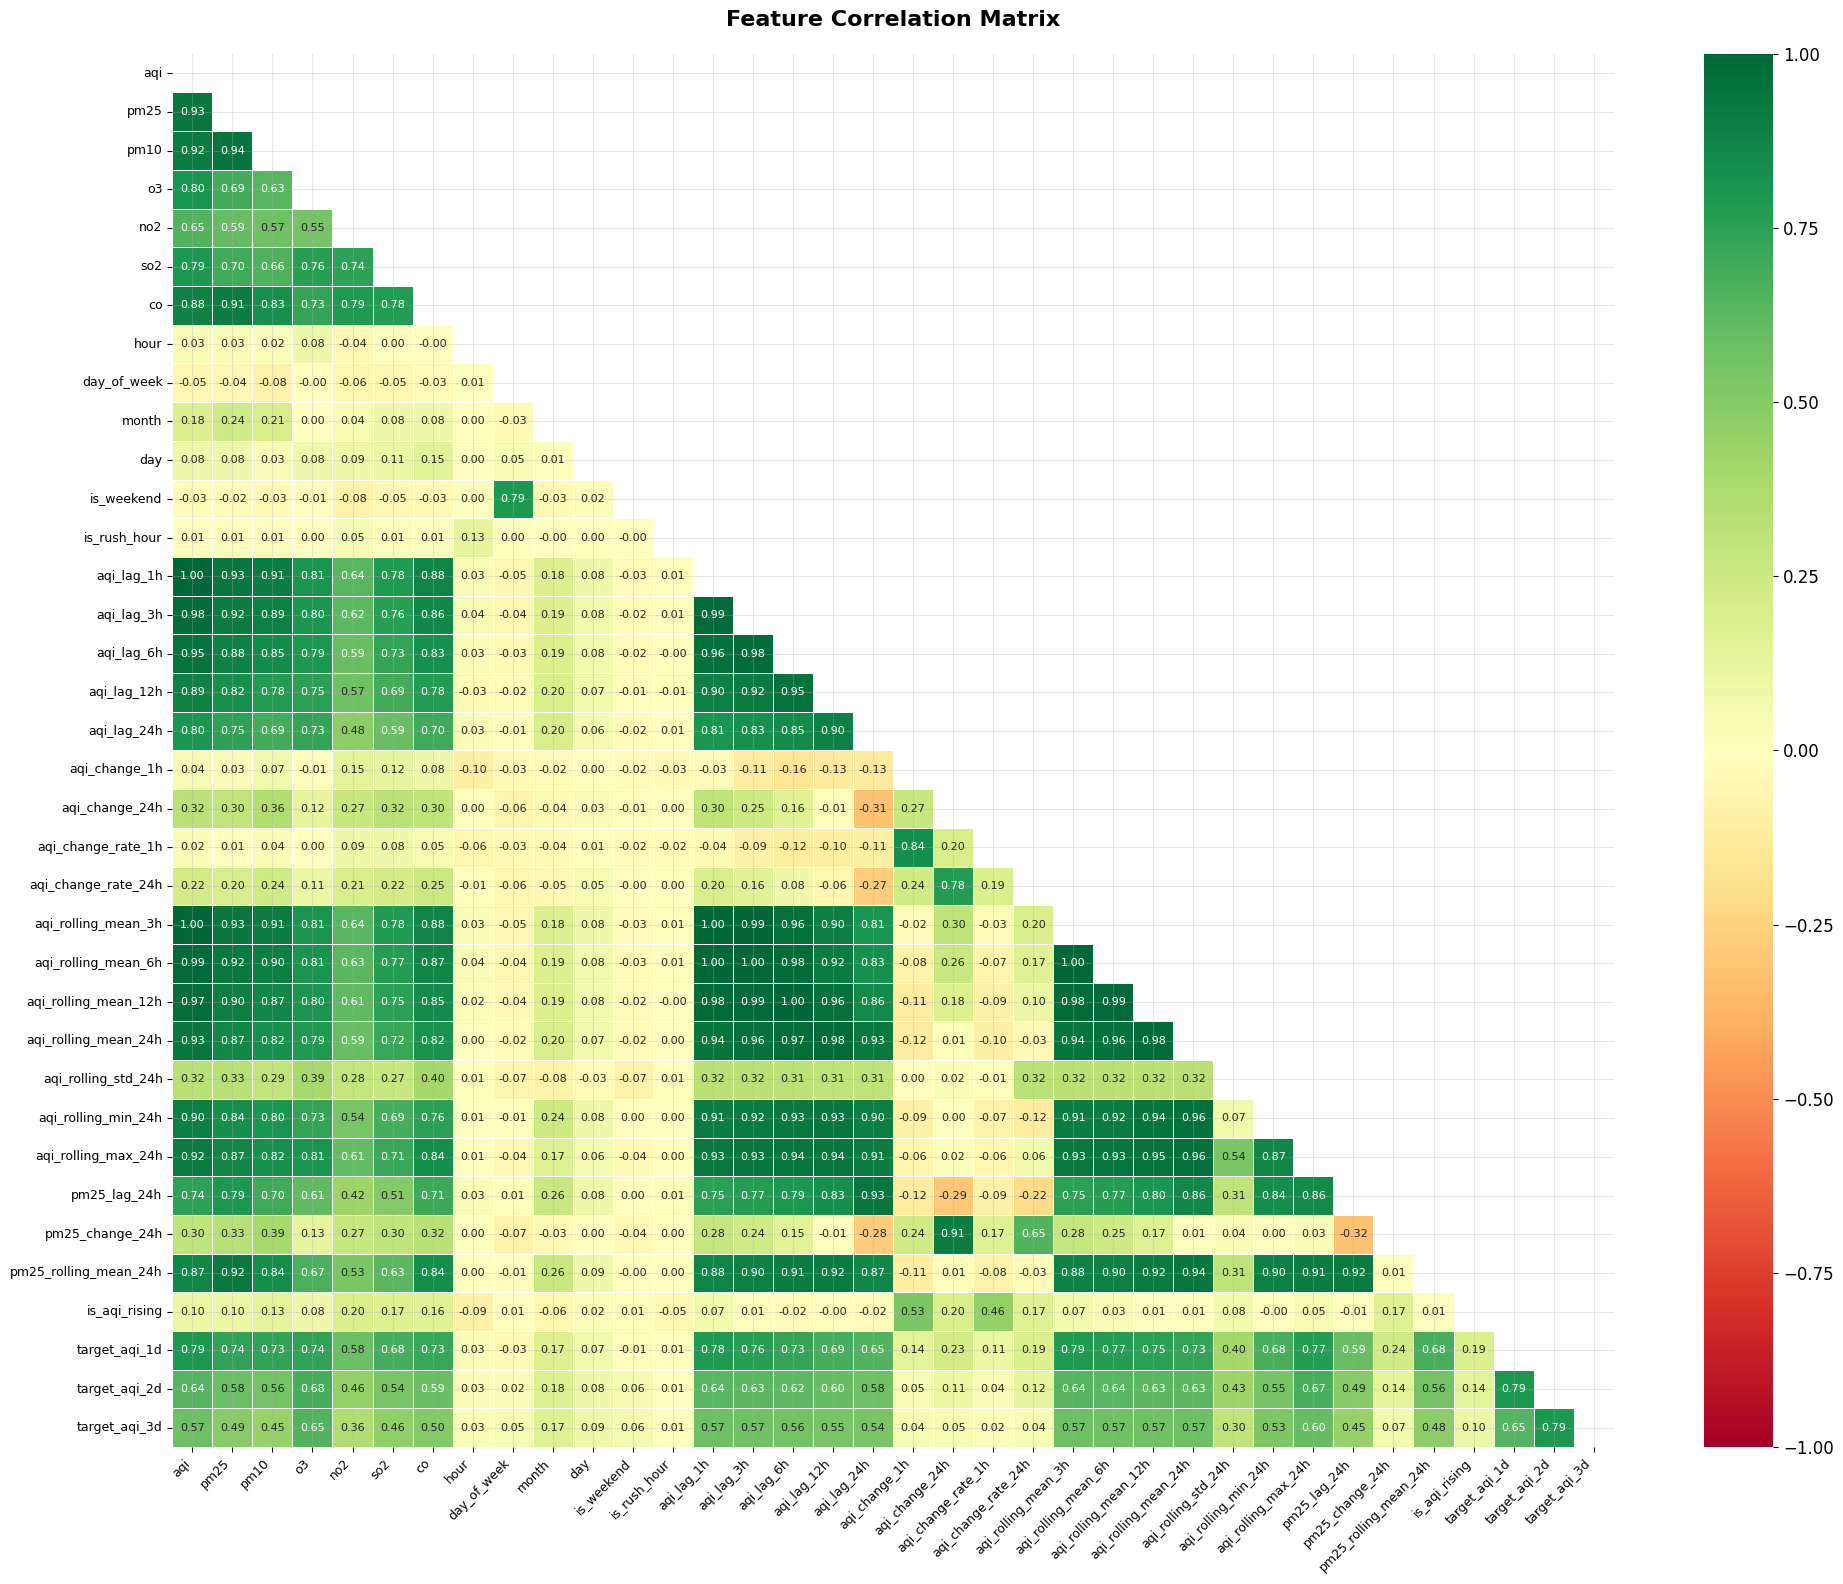


📊 TOP CORRELATIONS WITH AQI (Sorted):
  📈 aqi_rolling_mean_3h            0.998  🔴 STRONG
  📈 aqi_lag_1h                     0.997  🔴 STRONG
  📈 aqi_rolling_mean_6h            0.990  🔴 STRONG
  📈 aqi_lag_3h                     0.983  🔴 STRONG
  📈 aqi_rolling_mean_12h           0.969  🔴 STRONG
  📈 aqi_lag_6h                     0.951  🔴 STRONG
  📈 aqi_rolling_mean_24h           0.933  🔴 STRONG
  📈 pm25                           0.932  🔴 STRONG
  📈 aqi_rolling_max_24h            0.920  🔴 STRONG
  📈 pm10                           0.917  🔴 STRONG
  📈 aqi_rolling_min_24h            0.903  🔴 STRONG
  📈 aqi_lag_12h                    0.889  🔴 STRONG
  📈 co                             0.884  🔴 STRONG
  📈 pm25_rolling_mean_24h          0.874  🔴 STRONG
  📈 o3                             0.805  🔴 STRONG
  📈 aqi_lag_24h                    0.800  🔴 STRONG
  📈 target_aqi_1d                  0.794  🔴 STRONG
  📈 so2                            0.792  🔴 STRONG
  📈 pm25_lag_24h                   0.745  🔴

In [8]:
# Cell 8: Correlation Heatmap - KEY for feature selection
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
exclude_cols = ['aqi_openweather']  # Remove irrelevant
numeric_cols = [c for c in numeric_cols if c not in exclude_cols]

corr_matrix = df[numeric_cols].corr()

# Full correlation heatmap
plt.figure(figsize=(20, 16))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, 
            mask=mask,
            annot=True, 
            fmt='.2f',
            cmap='RdYlGn',
            center=0,
            vmin=-1, vmax=1,
            linewidths=0.5,
            annot_kws={'size': 8})

plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.savefig('eda_plots/06_correlation_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

# Show TOP correlations with AQI
print("\n📊 TOP CORRELATIONS WITH AQI (Sorted):")
print("="*50)
aqi_corr = corr_matrix['aqi'].drop('aqi').abs().sort_values(ascending=False)
for feat, corr_val in aqi_corr.items():
    direction = "📈" if corr_matrix['aqi'][feat] > 0 else "📉"
    strength = "🔴 STRONG" if abs(corr_val) > 0.7 else \
               "🟡 MODERATE" if abs(corr_val) > 0.4 else "🟢 WEAK"
    print(f"  {direction} {feat:<30} {corr_val:.3f}  {strength}")

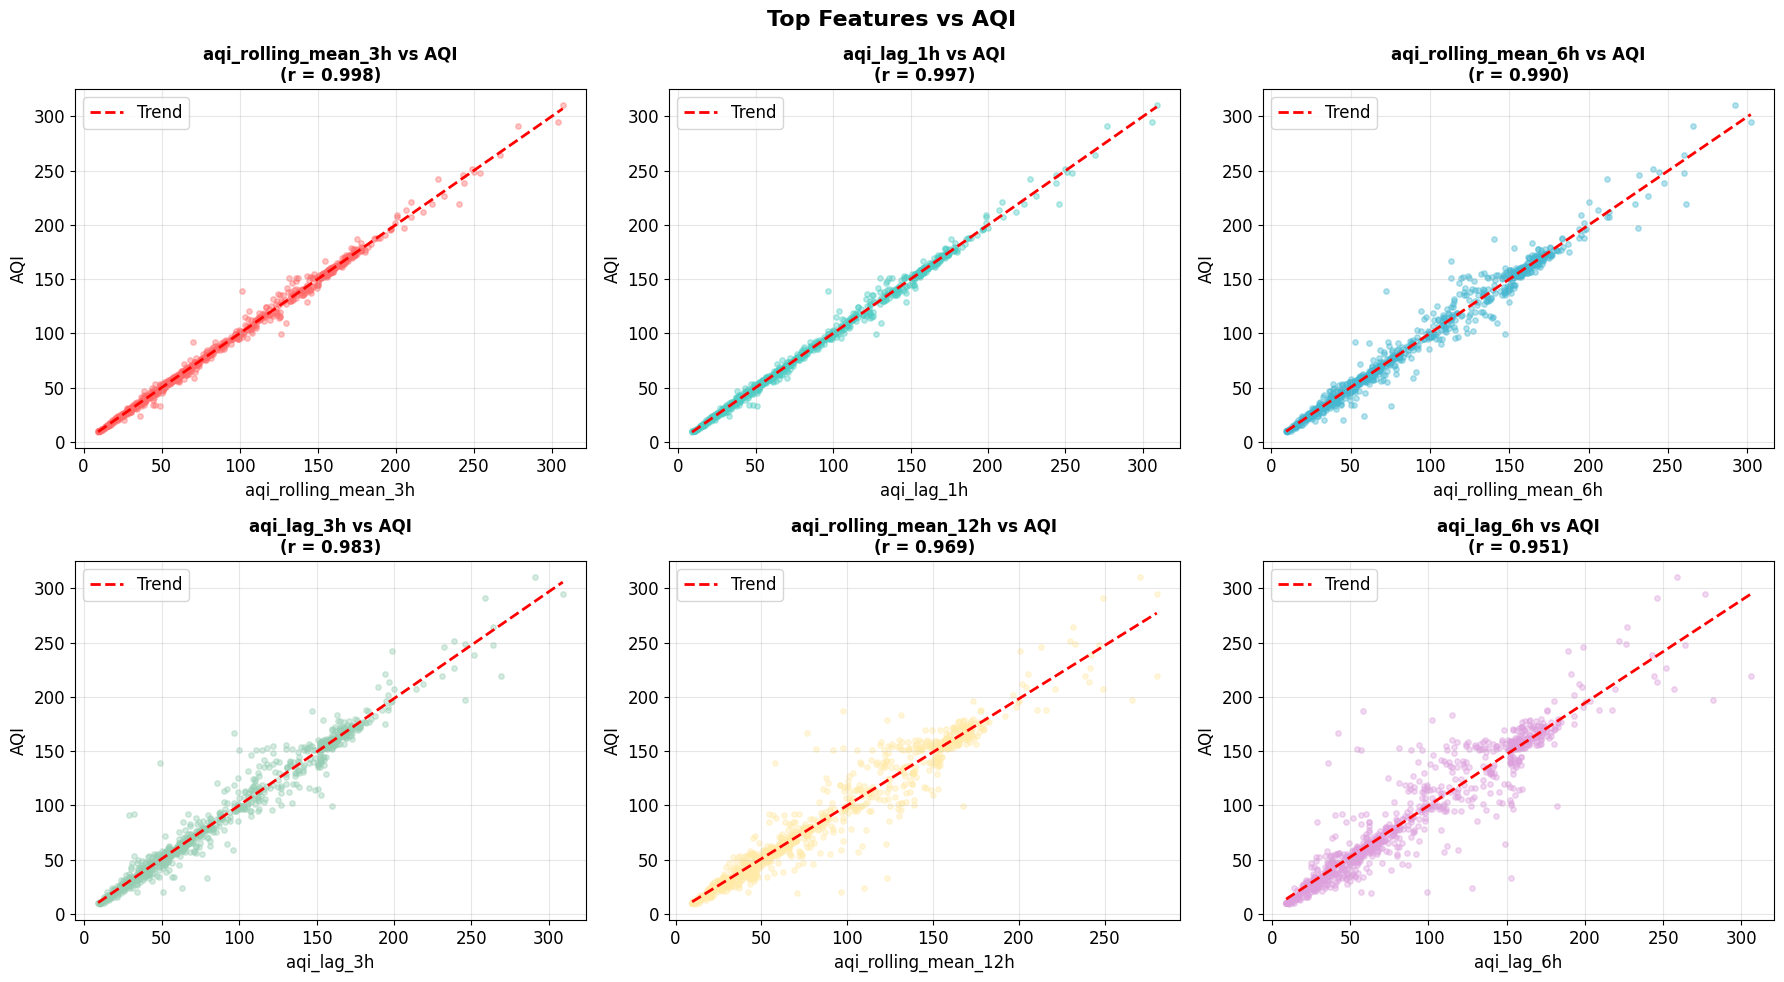

✅ Plot saved!


In [9]:
# Cell 9: Feature vs AQI Scatter Plots
# Top correlated features with AQI
top_features = aqi_corr.head(6).index.tolist()

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

colors_scatter = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD']

for i, feature in enumerate(top_features):
    ax = axes[i]
    
    # Sample 1000 points for clarity
    sample = df[[feature, 'aqi']].dropna().sample(
        min(1000, len(df)), random_state=42
    )
    
    ax.scatter(sample[feature], sample['aqi'],
               alpha=0.4, color=colors_scatter[i], s=15)
    
    # Add trend line
    z = np.polyfit(sample[feature], sample['aqi'], 1)
    p = np.poly1d(z)
    x_line = np.linspace(sample[feature].min(), sample[feature].max(), 100)
    ax.plot(x_line, p(x_line), 'r--', linewidth=2, label='Trend')
    
    corr_val = corr_matrix['aqi'][feature]
    ax.set_title(f'{feature} vs AQI\n(r = {corr_val:.3f})',
                 fontsize=12, fontweight='bold')
    ax.set_xlabel(feature)
    ax.set_ylabel('AQI')
    ax.legend()

plt.suptitle('Top Features vs AQI', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('eda_plots/07_feature_vs_aqi.png', dpi=150, bbox_inches='tight')
plt.show()
print("✅ Plot saved!")

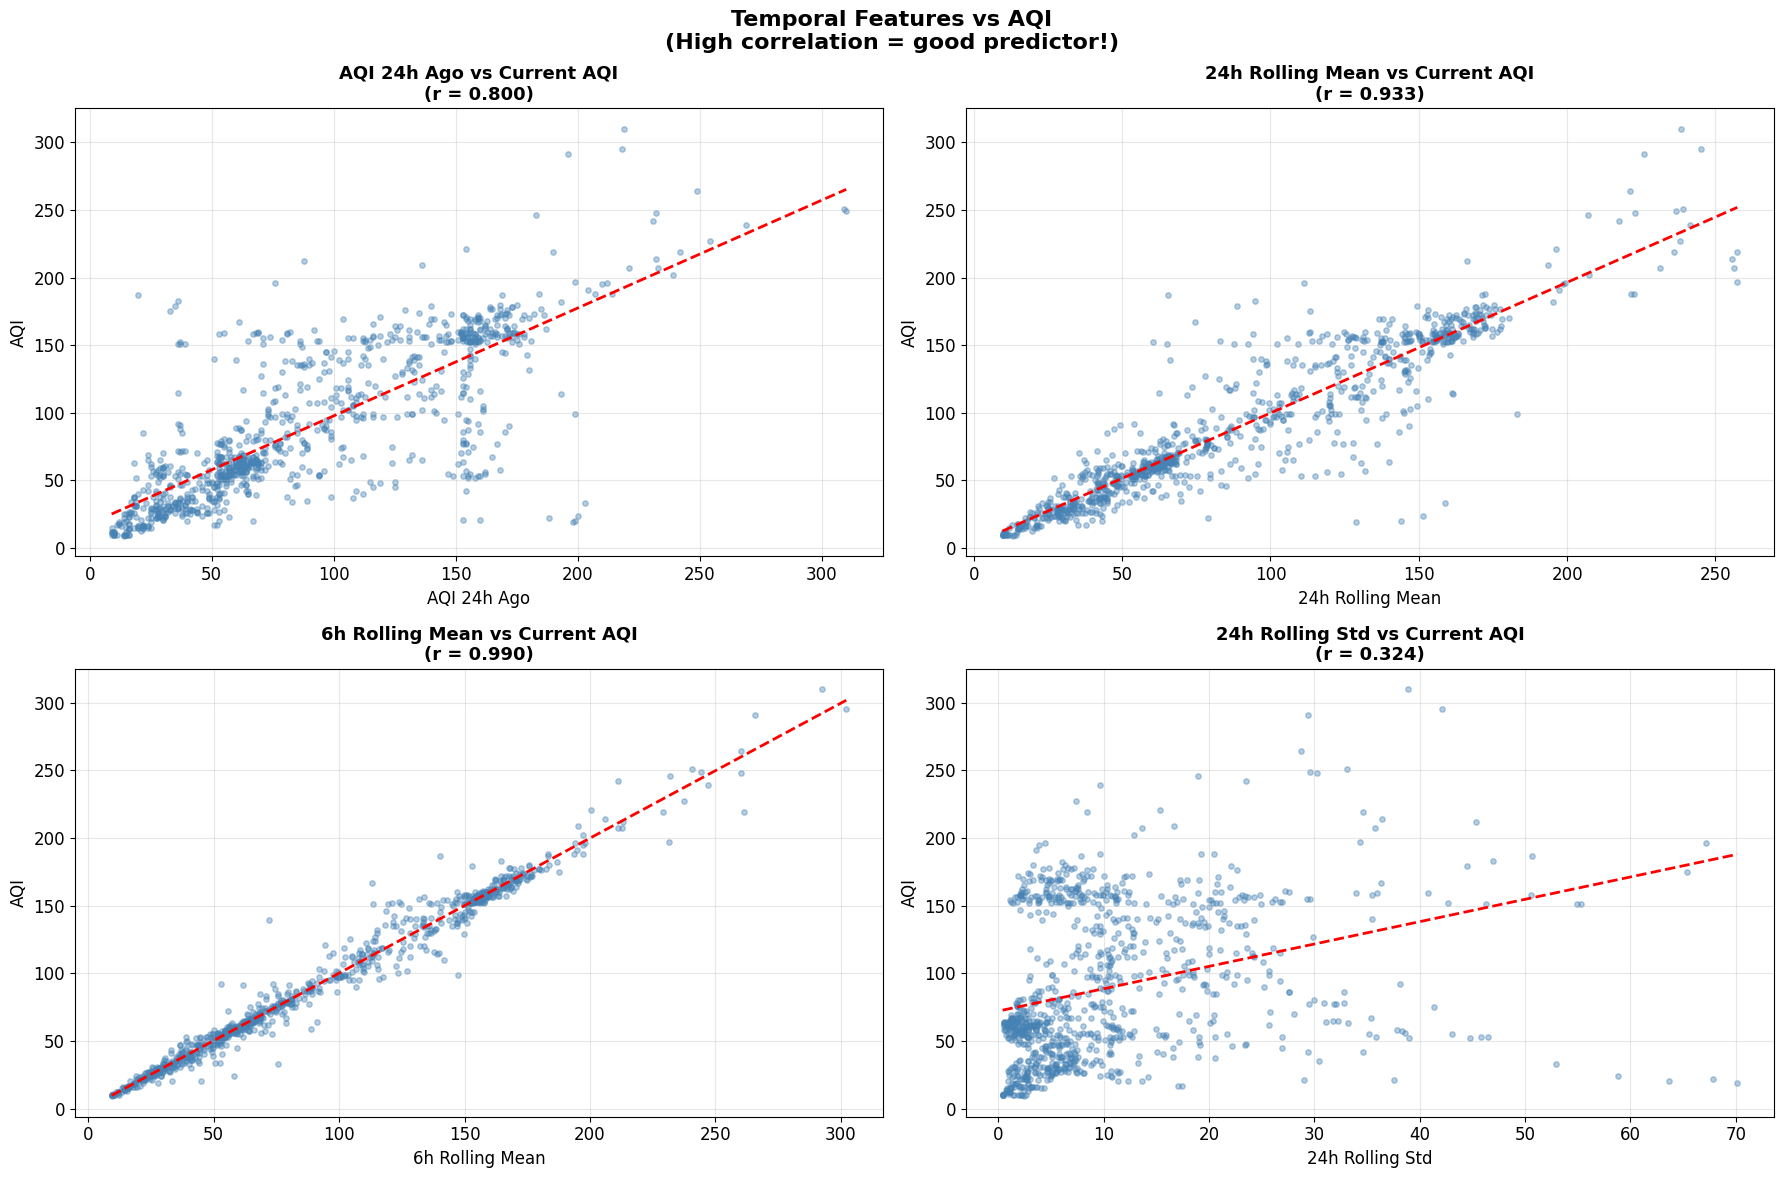


💡 KEY INSIGHT:
   High correlation between lag/rolling features and AQI
   means past AQI is a strong predictor of future AQI!
   → KEEP these features for model training!


In [10]:
# Cell 10: Rolling Features vs AQI (Temporal Dependency)
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

rolling_features = [
    ('aqi_lag_24h', 'AQI 24h Ago'),
    ('aqi_rolling_mean_24h', '24h Rolling Mean'),
    ('aqi_rolling_mean_6h', '6h Rolling Mean'),
    ('aqi_rolling_std_24h', '24h Rolling Std')
]

for i, (feature, label) in enumerate(rolling_features):
    ax = axes[i // 2, i % 2]
    
    if feature not in df.columns:
        continue
    
    sample = df[[feature, 'aqi']].dropna().sample(
        min(1000, len(df)), random_state=42
    )
    
    ax.scatter(sample[feature], sample['aqi'],
               alpha=0.4, color='steelblue', s=15)
    
    # Trend line
    z = np.polyfit(sample[feature], sample['aqi'], 1)
    p = np.poly1d(z)
    x_line = np.linspace(sample[feature].min(), sample[feature].max(), 100)
    ax.plot(x_line, p(x_line), 'r--', linewidth=2)
    
    corr_val = df[[feature, 'aqi']].dropna().corr().iloc[0, 1]
    ax.set_title(f'{label} vs Current AQI\n(r = {corr_val:.3f})',
                 fontsize=13, fontweight='bold')
    ax.set_xlabel(label)
    ax.set_ylabel('AQI')

plt.suptitle('Temporal Features vs AQI\n(High correlation = good predictor!)',
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('eda_plots/08_rolling_features.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n💡 KEY INSIGHT:")
print("   High correlation between lag/rolling features and AQI")
print("   means past AQI is a strong predictor of future AQI!")
print("   → KEEP these features for model training!")

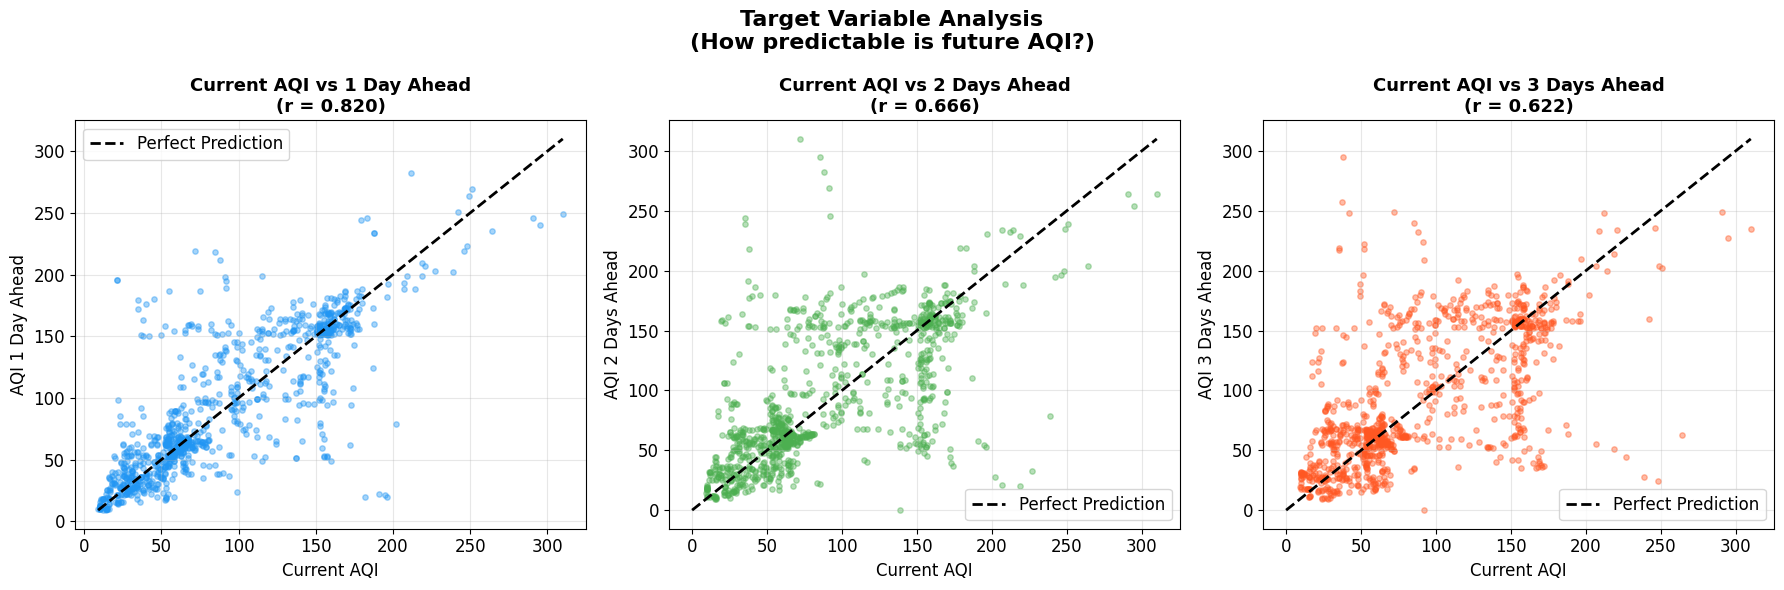


💡 KEY INSIGHT:
   If points cluster near the diagonal line,
   current AQI is a strong predictor of future AQI!


In [11]:
# Cell 11: Target Variable Analysis
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

targets = ['target_aqi_1d', 'target_aqi_2d', 'target_aqi_3d']
titles = ['1 Day Ahead', '2 Days Ahead', '3 Days Ahead']
colors = ['#2196F3', '#4CAF50', '#FF5722']

for i, (target, title, color) in enumerate(zip(targets, titles, colors)):
    if target not in df.columns:
        continue
    
    ax = axes[i]
    
    # Scatter: current AQI vs future AQI
    sample = df[['aqi', target]].dropna().sample(
        min(1000, len(df)), random_state=42
    )
    
    ax.scatter(sample['aqi'], sample[target],
               alpha=0.4, color=color, s=15)
    
    # Perfect prediction line
    min_val = min(sample['aqi'].min(), sample[target].min())
    max_val = max(sample['aqi'].max(), sample[target].max())
    ax.plot([min_val, max_val], [min_val, max_val],
            'k--', linewidth=2, label='Perfect Prediction')
    
    corr_val = sample.corr().iloc[0, 1]
    
    ax.set_title(f'Current AQI vs {title}\n(r = {corr_val:.3f})',
                 fontsize=13, fontweight='bold')
    ax.set_xlabel('Current AQI')
    ax.set_ylabel(f'AQI {title}')
    ax.legend()

plt.suptitle('Target Variable Analysis\n(How predictable is future AQI?)',
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('eda_plots/09_target_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n💡 KEY INSIGHT:")
print("   If points cluster near the diagonal line,")
print("   current AQI is a strong predictor of future AQI!")

In [17]:
from sklearn.preprocessing import LabelEncoder

# ============================================================
# Load data
# ============================================================
df = pd.read_csv('cleaned_data2/karachi_cleaned2.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Encode season if string
if 'season' in df.columns and df['season'].dtype == 'object':
    le = LabelEncoder()
    df['season'] = le.fit_transform(df['season'].fillna('unknown'))

# ============================================================
# Separate features and targets
# ============================================================
target_cols = ['target_aqi_1d', 'target_aqi_2d', 'target_aqi_3d']

# Drop non-numeric / identifier columns
drop_cols = ['timestamp', 'city', 'dominant_pollutant', 'aqi_openweather']
feature_cols = [
    col for col in df.columns
    if col not in drop_cols
    and col not in target_cols
    and df[col].dtype in ['float64', 'float32', 'int64', 'int32']
]

# ============================================================
# Calculate correlation of every feature with each target
# ============================================================
corr_data = {}

for target in target_cols:
    corr_data[target] = []
    for feat in feature_cols:
        corr_val = df[[feat, target]].dropna().corr().iloc[0, 1]
        corr_data[target].append(corr_val)

corr_df = pd.DataFrame(corr_data, index=feature_cols)

# Rename columns for clarity
corr_df.columns = ['Day 1 Ahead', 'Day 2 Ahead', 'Day 3 Ahead']

# Sort by Day 1 correlation (absolute value)
corr_df = corr_df.reindex(
    corr_df['Day 1 Ahead'].abs().sort_values(ascending=False).index
)

print(f"✅ Correlation matrix shape: {corr_df.shape}")
print(f"📊 Features: {len(feature_cols)}")
display(corr_df.round(3))

✅ Correlation matrix shape: (33, 3)
📊 Features: 33


,Day 1 Ahead,Day 2 Ahead,Day 3 Ahead
aqi,0.794,0.644,0.573
aqi_rolling_mean_3h,0.785,0.641,0.571
aqi_lag_1h,0.784,0.640,0.570
aqi_rolling_mean_6h,0.773,0.637,0.569
aqi_rolling_max_24h,0.772,0.675,0.596
aqi_lag_3h,0.764,0.632,0.565
aqi_rolling_mean_12h,0.752,0.631,0.568
o3,0.742,0.683,0.653
pm25,0.739,0.582,0.492
pm10,0.735,0.556,0.451


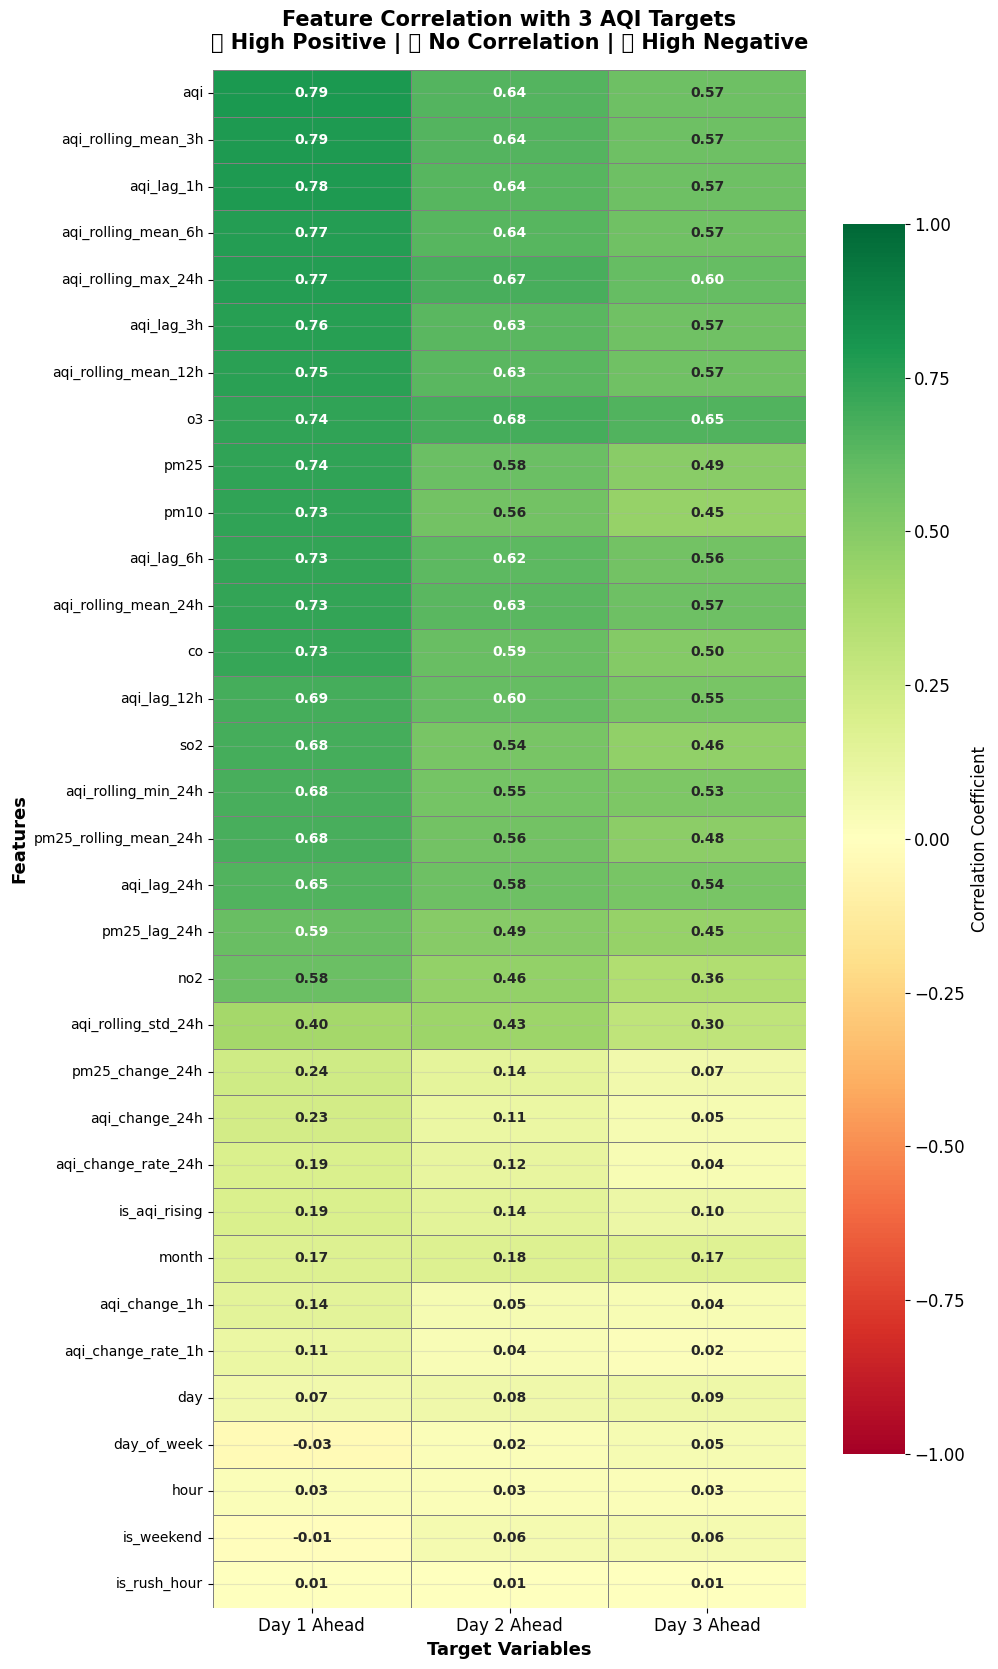

✅ Saved: eda_plots/feature_target_correlation.png


In [18]:
# ============================================================
# PLOT 1: Full Heatmap - All features vs 3 targets
# ============================================================
fig, ax = plt.subplots(figsize=(10, len(feature_cols) * 0.45 + 2))

sns.heatmap(
    corr_df,
    annot=True,
    fmt='.2f',
    cmap='RdYlGn',
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    linecolor='gray',
    ax=ax,
    annot_kws={'size': 10, 'weight': 'bold'},
    cbar_kws={'label': 'Correlation Coefficient', 'shrink': 0.8}
)

ax.set_title(
    'Feature Correlation with 3 AQI Targets\n'
    '🟢 High Positive | ⬜ No Correlation | 🔴 High Negative',
    fontsize=15,
    fontweight='bold',
    pad=15
)

ax.set_xlabel('Target Variables', fontsize=13, fontweight='bold')
ax.set_ylabel('Features', fontsize=13, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)

plt.tight_layout()
import os
os.makedirs('eda_plots', exist_ok=True)
plt.savefig('eda_plots/feature_target_correlation.png', dpi=150, bbox_inches='tight')
plt.show()
print("✅ Saved: eda_plots/feature_target_correlation.png")

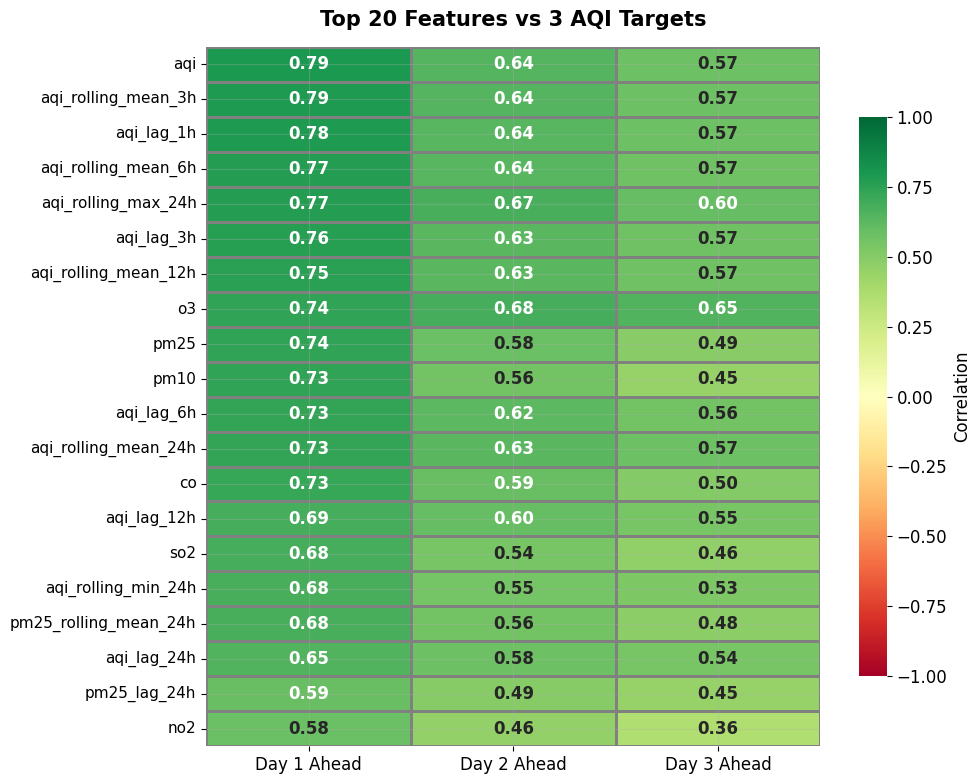

✅ Saved: eda_plots/top20_feature_target_correlation.png


In [37]:
# ============================================================
# PLOT 2: Top 20 Features only (cleaner view)
# ============================================================
top20 = corr_df.head(20)

fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(
    top20,
    annot=True,
    fmt='.2f',
    cmap='RdYlGn',
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.8,
    linecolor='gray',
    ax=ax,
    annot_kws={'size': 12, 'weight': 'bold'},
    cbar_kws={'label': 'Correlation', 'shrink': 0.8}
)

ax.set_title(
    'Top 20 Features vs 3 AQI Targets',
    fontsize=15,
    fontweight='bold',
    pad=15
)

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=11)

plt.tight_layout()
plt.savefig('eda_plots/top20_feature_target_correlation.png', dpi=150, bbox_inches='tight')
plt.show()
print("✅ Saved: eda_plots/top20_feature_target_correlation.png")

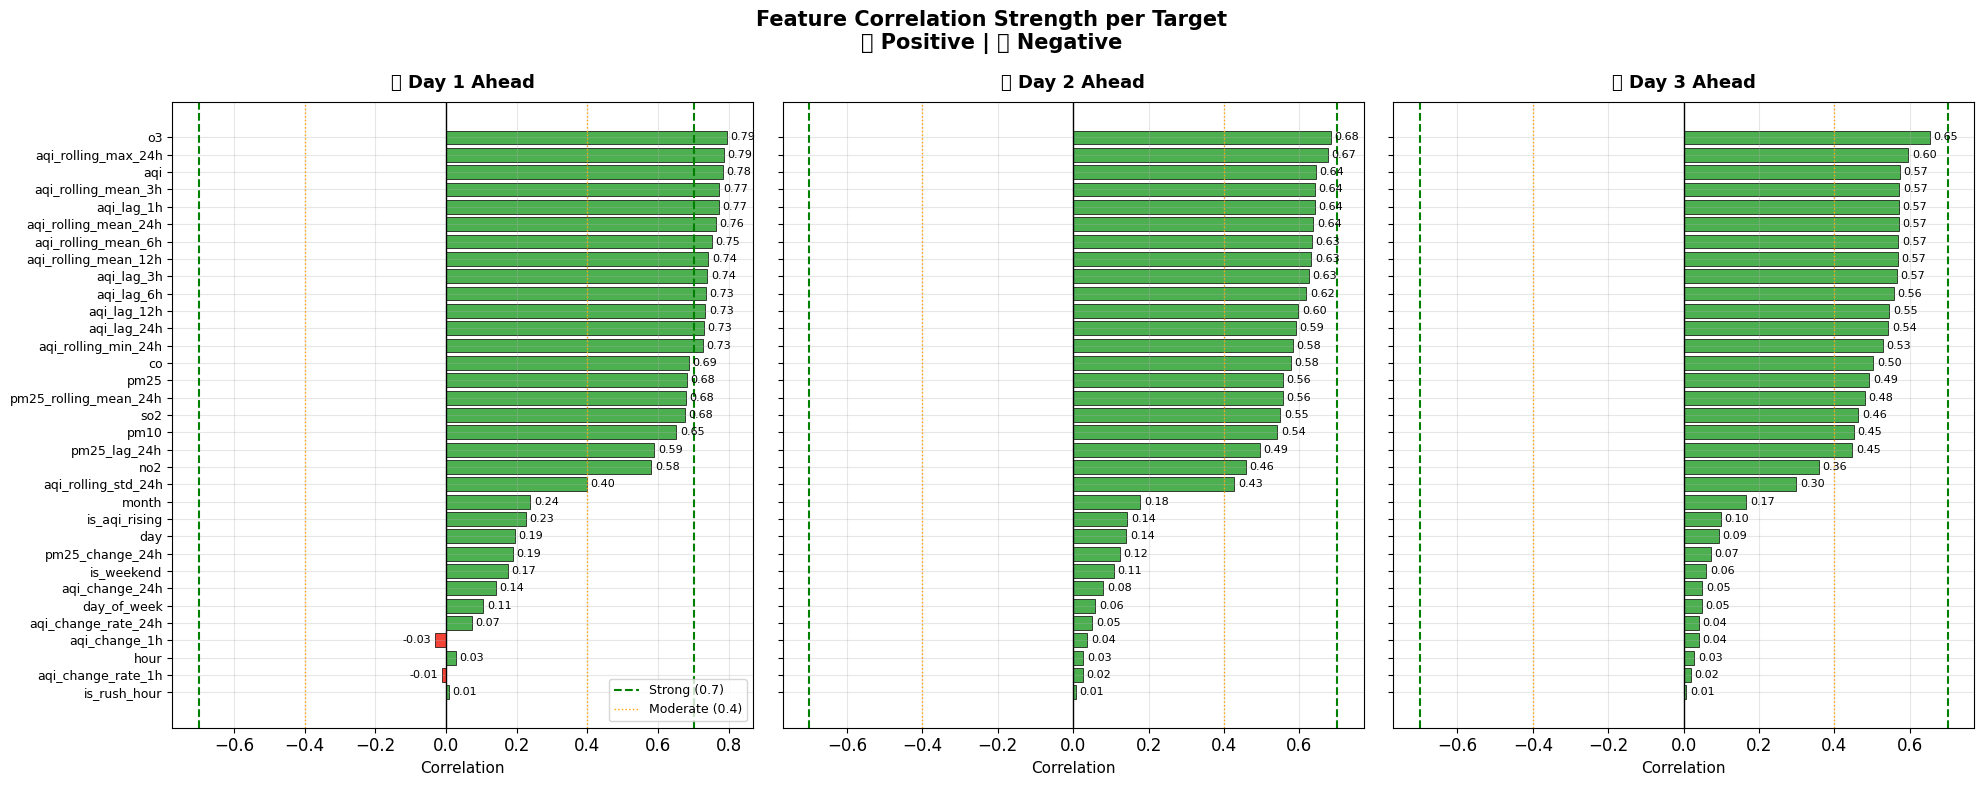

✅ Saved: eda_plots/correlation_per_target.png


In [23]:
# ============================================================
# PLOT 3: Bar chart - correlation strength per target
# ============================================================
fig, axes = plt.subplots(1, 3, figsize=(20, 8), sharey=True)

target_labels = ['Day 1 Ahead', 'Day 2 Ahead', 'Day 3 Ahead']
colors_pos = '#4CAF50'
colors_neg = '#f44336'

for i, target in enumerate(target_labels):
    ax = axes[i]

    # Sort by absolute correlation
    sorted_corr = corr_df[target].abs().sort_values(ascending=True)
    values = corr_df[target][sorted_corr.index]

    # Color bars by positive/negative
    bar_colors = [colors_pos if v >= 0 else colors_neg for v in values]

    bars = ax.barh(
        range(len(values)),
        values,
        color=bar_colors,
        edgecolor='black',
        linewidth=0.5
    )

    ax.set_yticks(range(len(values)))
    ax.set_yticklabels(values.index, fontsize=9)
    ax.set_title(f'🎯 {target}', fontsize=13, fontweight='bold', pad=10)
    ax.set_xlabel('Correlation', fontsize=11)
    ax.axvline(x=0, color='black', linewidth=1)
    ax.axvline(x=0.7, color='green', linewidth=1.5,
               linestyle='--', label='Strong (0.7)')
    ax.axvline(x=-0.7, color='green', linewidth=1.5, linestyle='--')
    ax.axvline(x=0.4, color='orange', linewidth=1,
               linestyle=':', label='Moderate (0.4)')
    ax.axvline(x=-0.4, color='orange', linewidth=1, linestyle=':')

    if i == 0:
        ax.legend(fontsize=9, loc='lower right')

    # Add value labels
    for bar, val in zip(bars, values):
        ax.text(
            val + (0.01 if val >= 0 else -0.01),
            bar.get_y() + bar.get_height() / 2,
            f'{val:.2f}',
            va='center',
            ha='left' if val >= 0 else 'right',
            fontsize=8
        )

plt.suptitle(
    'Feature Correlation Strength per Target\n'
    '🟢 Positive | 🔴 Negative',
    fontsize=15,
    fontweight='bold'
)
plt.tight_layout()
plt.savefig('eda_plots/correlation_per_target.png', dpi=150, bbox_inches='tight')
plt.show()
print("✅ Saved: eda_plots/correlation_per_target.png")

In [26]:
# ============================================================
# PRINT: Feature selection decision based on correlation
# ============================================================
print("\n" + "="*65)
print("🎯 FEATURE SELECTION BASED ON TARGET CORRELATION")
print("="*65)

STRONG    = 0.7
MODERATE  = 0.4

print(f"\n{'Feature':<35} {'Day1':>8} {'Day2':>8} {'Day3':>8}  Decision")
print("-"*65)

keep_features   = []
review_features = []
drop_features   = []

for feat in corr_df.index:
    d1 = corr_df.loc[feat, 'Day 1 Ahead']
    d2 = corr_df.loc[feat, 'Day 2 Ahead']
    d3 = corr_df.loc[feat, 'Day 3 Ahead']

    max_corr = max(abs(d1), abs(d2), abs(d3))

    if max_corr >= STRONG:
        decision = "✅ KEEP   (Strong)"
        keep_features.append(feat)
    elif max_corr >= MODERATE:
        decision = "🟡 REVIEW (Moderate)"
        review_features.append(feat)
    else:
        decision = "❌ DROP   (Weak)"
        drop_features.append(feat)

    print(f"{feat:<35} {d1:>8.3f} {d2:>8.3f} {d3:>8.3f}  {decision}")

print("\n" + "="*65)
print(f"✅ STRONG features  (≥ 0.7): {len(keep_features)}")
print(f"🟡 MODERATE features (0.4-0.7): {len(review_features)}")
print(f"❌ WEAK features    (< 0.4):  {len(drop_features)}")
print("="*65)

print(f"\n✅ KEEP these features:")
for f in keep_features:
    print(f"   → {f}")

print(f"\n🟡 REVIEW these (your choice):")
for f in review_features:
    print(f"   → {f}")

print(f"\n❌ CONSIDER DROPPING:")
for f in drop_features:
    print(f"   → {f}")


🎯 FEATURE SELECTION BASED ON TARGET CORRELATION

Feature                                 Day1     Day2     Day3  Decision
-----------------------------------------------------------------
aqi                                    0.794    0.644    0.573  ✅ KEEP   (Strong)
aqi_rolling_mean_3h                    0.785    0.641    0.571  ✅ KEEP   (Strong)
aqi_lag_1h                             0.784    0.640    0.570  ✅ KEEP   (Strong)
aqi_rolling_mean_6h                    0.773    0.637    0.569  ✅ KEEP   (Strong)
aqi_rolling_max_24h                    0.772    0.675    0.596  ✅ KEEP   (Strong)
aqi_lag_3h                             0.764    0.632    0.565  ✅ KEEP   (Strong)
aqi_rolling_mean_12h                   0.752    0.631    0.568  ✅ KEEP   (Strong)
o3                                     0.742    0.683    0.653  ✅ KEEP   (Strong)
pm25                                   0.739    0.582    0.492  ✅ KEEP   (Strong)
pm10                                   0.735    0.556    0.451  ✅ KEEP   

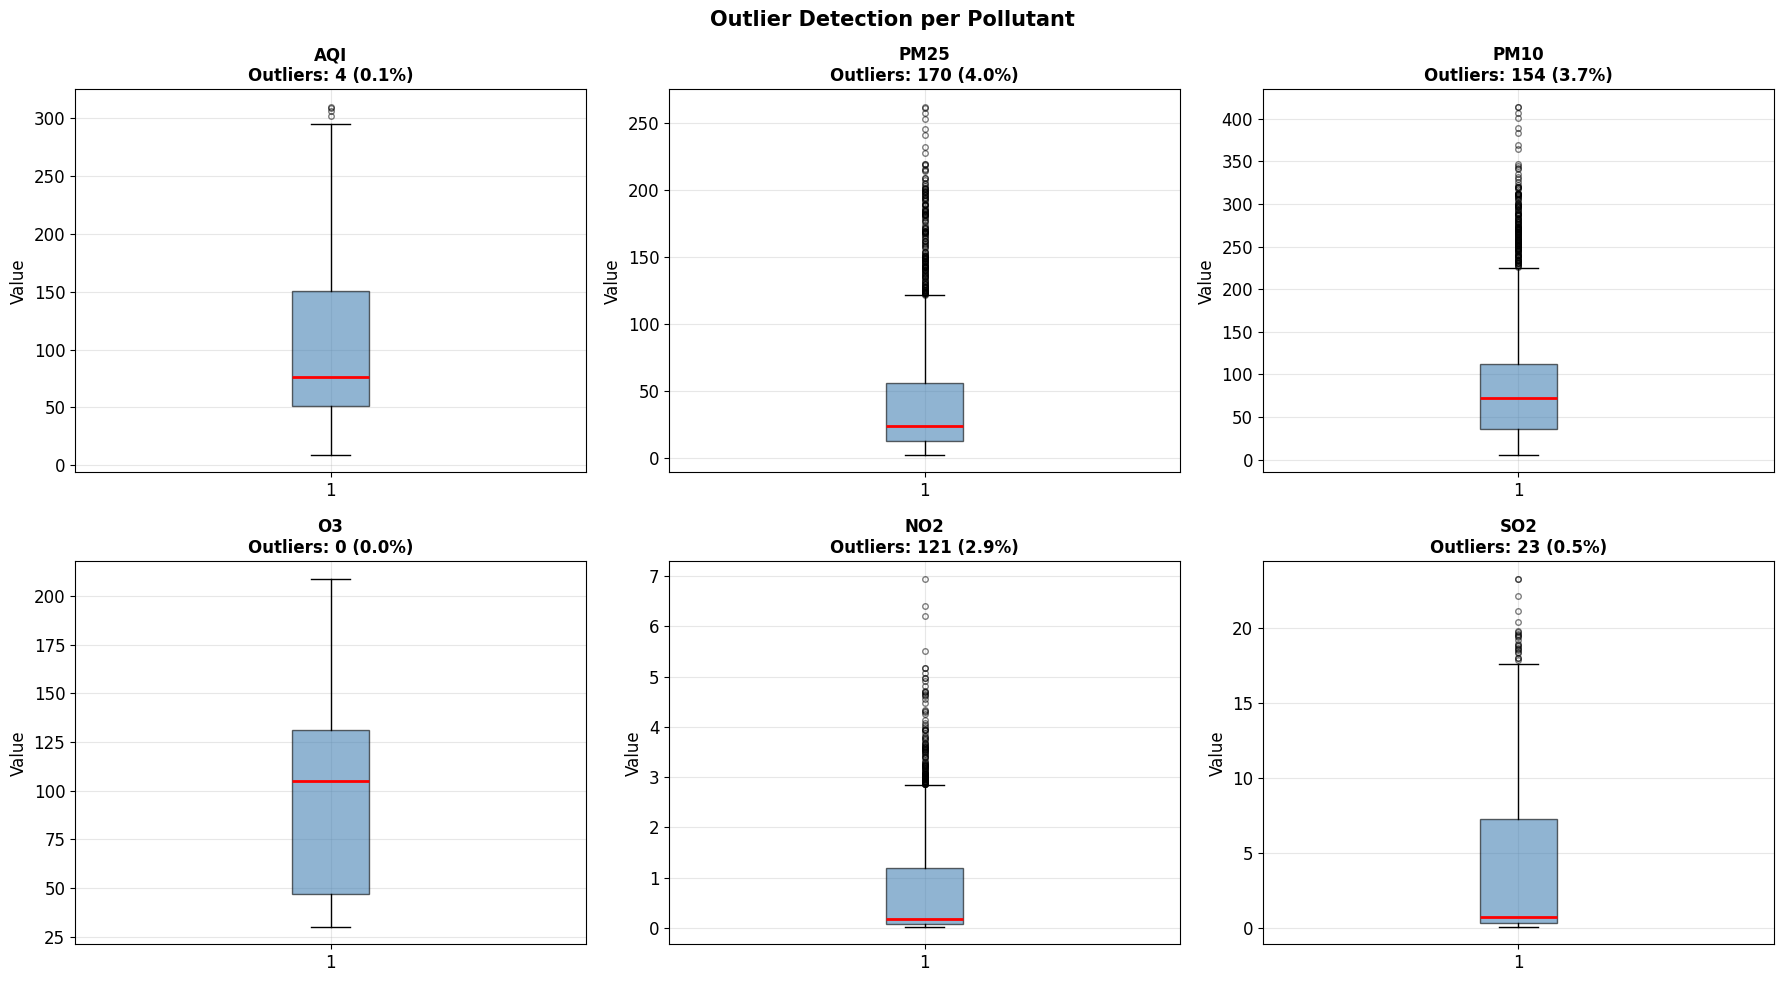


📊 OUTLIER SUMMARY:
  aqi        Outliers:    4 (0.1%)
  pm25       Outliers:  170 (4.0%)
  pm10       Outliers:  154 (3.7%)
  o3         Outliers:    0 (0.0%)
  no2        Outliers:  121 (2.9%)
  so2        Outliers:   23 (0.5%)


In [28]:
# Outlier Detection - Important before training!
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

pollutants = ['aqi', 'pm25', 'pm10', 'o3', 'no2', 'so2']

for i, col in enumerate(pollutants):
    if col not in df.columns:
        continue

    ax = axes[i]
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]

    ax.boxplot(df[col].dropna(), patch_artist=True,
               boxprops=dict(facecolor='steelblue', alpha=0.6),
               medianprops=dict(color='red', linewidth=2),
               flierprops=dict(marker='o', color='red',
                               markersize=4, alpha=0.5))

    ax.set_title(
        f'{col.upper()}\nOutliers: {len(outliers)} '
        f'({len(outliers)/len(df)*100:.1f}%)',
        fontsize=12, fontweight='bold'
    )
    ax.set_ylabel('Value')

plt.suptitle('Outlier Detection per Pollutant',
             fontsize=15, fontweight='bold')
plt.tight_layout()
plt.savefig('eda_plots/outlier_detection.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n📊 OUTLIER SUMMARY:")
print("="*50)
for col in pollutants:
    if col not in df.columns:
        continue
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[
        (df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)
    ]
    print(f"  {col:<10} Outliers: {len(outliers):>4} "
          f"({len(outliers)/len(df)*100:.1f}%)")

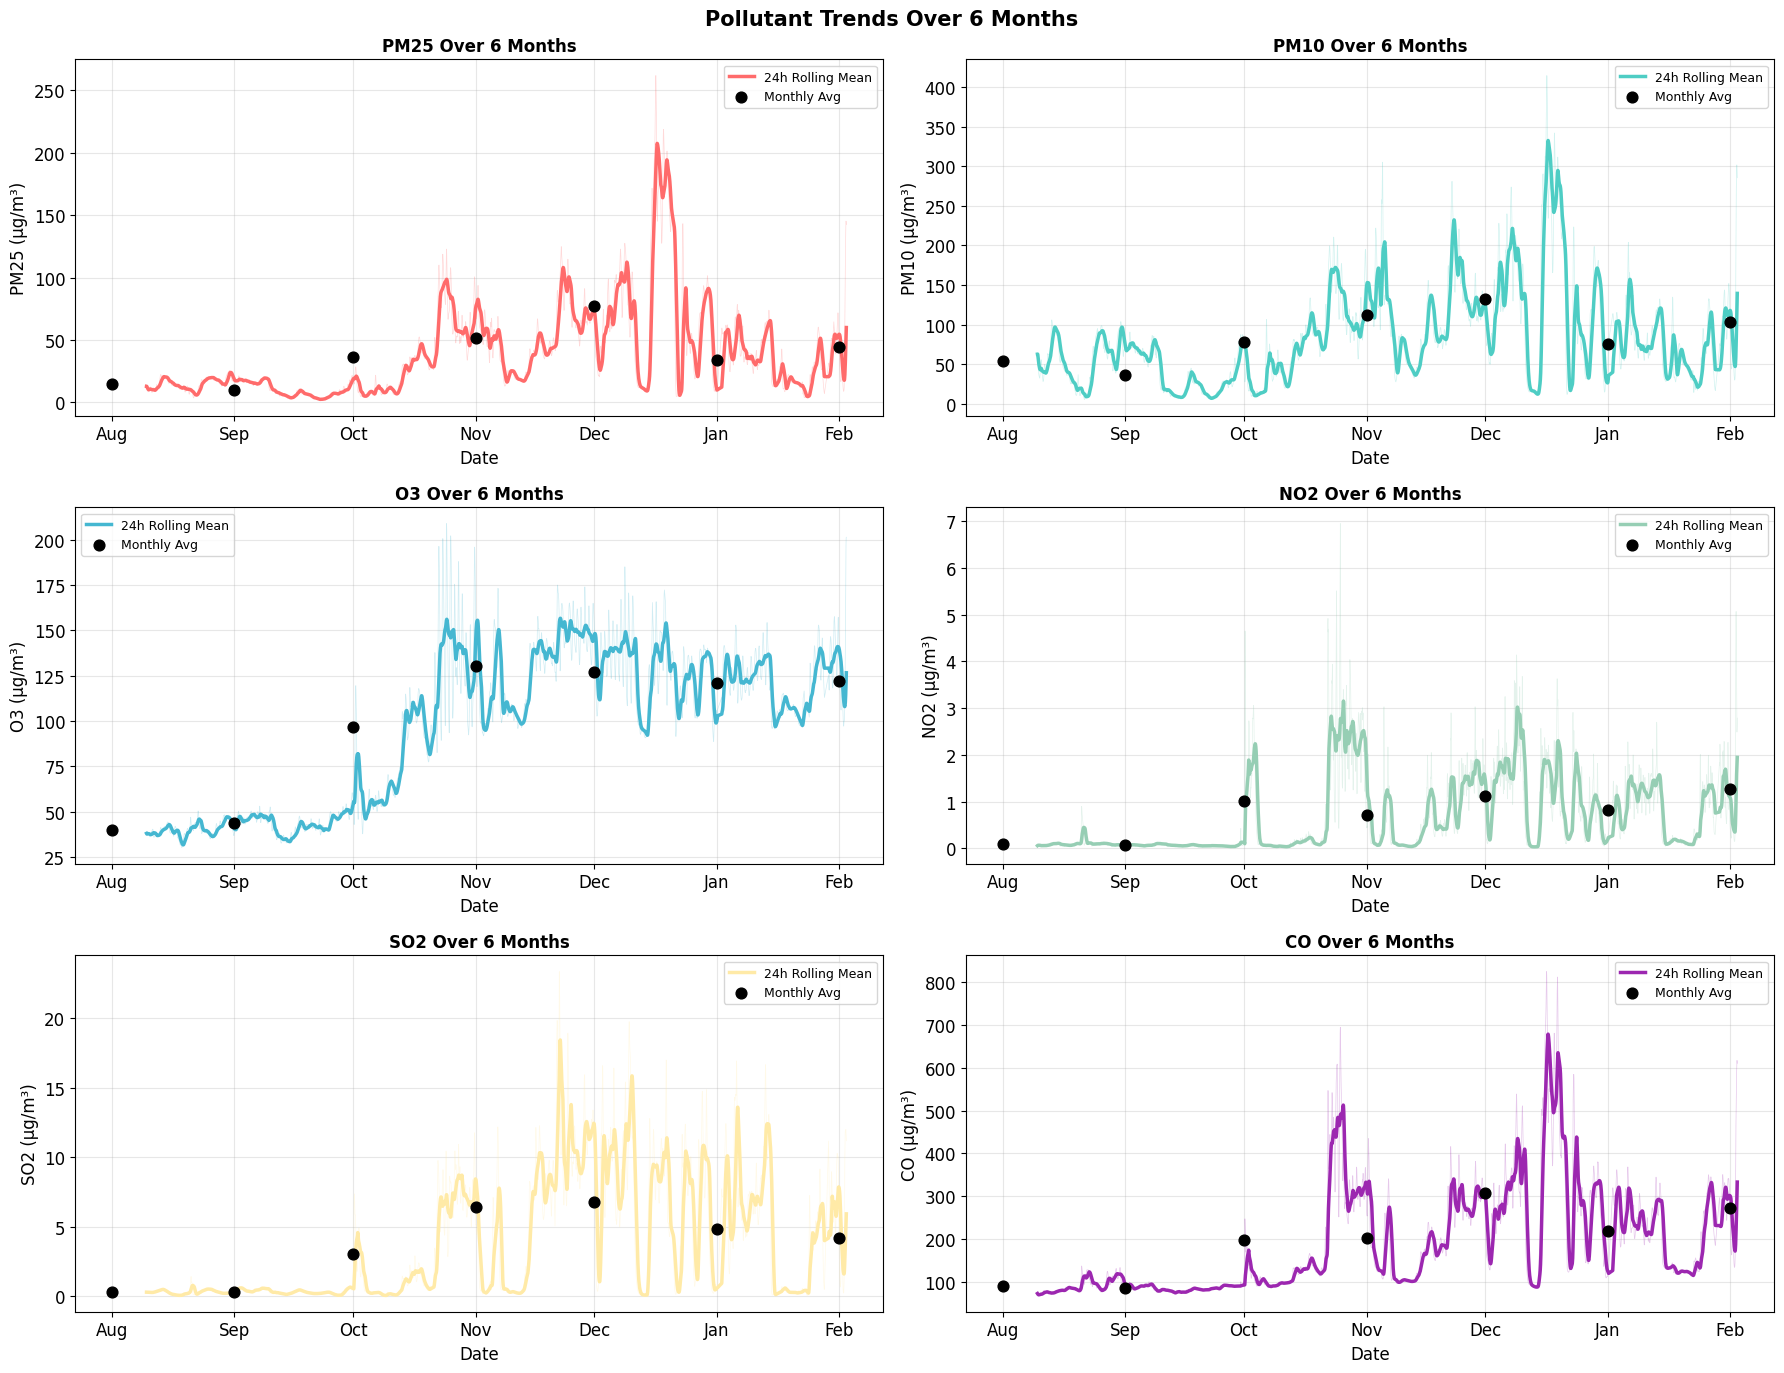

In [29]:
# All pollutants trend over time
fig, axes = plt.subplots(3, 2, figsize=(18, 14))
axes = axes.flatten()

pollutants = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1',
          '#96CEB4', '#FFEAA7', '#9C27B0']

for i, (col, color) in enumerate(zip(pollutants, colors)):
    if col not in df.columns:
        continue

    ax = axes[i]

    # Raw (faint)
    ax.plot(df['timestamp'], df[col],
            color=color, alpha=0.25, linewidth=0.5)

    # 24h rolling mean (bold)
    rolling = df[col].rolling(window=24, min_periods=1).mean()
    ax.plot(df['timestamp'], rolling,
            color=color, linewidth=2.5,
            label='24h Rolling Mean')

    # Monthly average points
    monthly = df.groupby(df['timestamp'].dt.to_period('M'))[col].mean()
    monthly_dates = monthly.index.to_timestamp()
    ax.scatter(monthly_dates, monthly.values,
               color='black', s=60, zorder=5,
               label='Monthly Avg')

    ax.set_title(f'{col.upper()} Over 6 Months',
                 fontsize=12, fontweight='bold')
    ax.set_xlabel('Date')
    ax.set_ylabel(f'{col.upper()} (µg/m³)')
    ax.legend(fontsize=9)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.suptitle('Pollutant Trends Over 6 Months',
             fontsize=15, fontweight='bold')
plt.tight_layout()
plt.savefig('eda_plots/pollutant_trends.png',
            dpi=150, bbox_inches='tight')
plt.show()

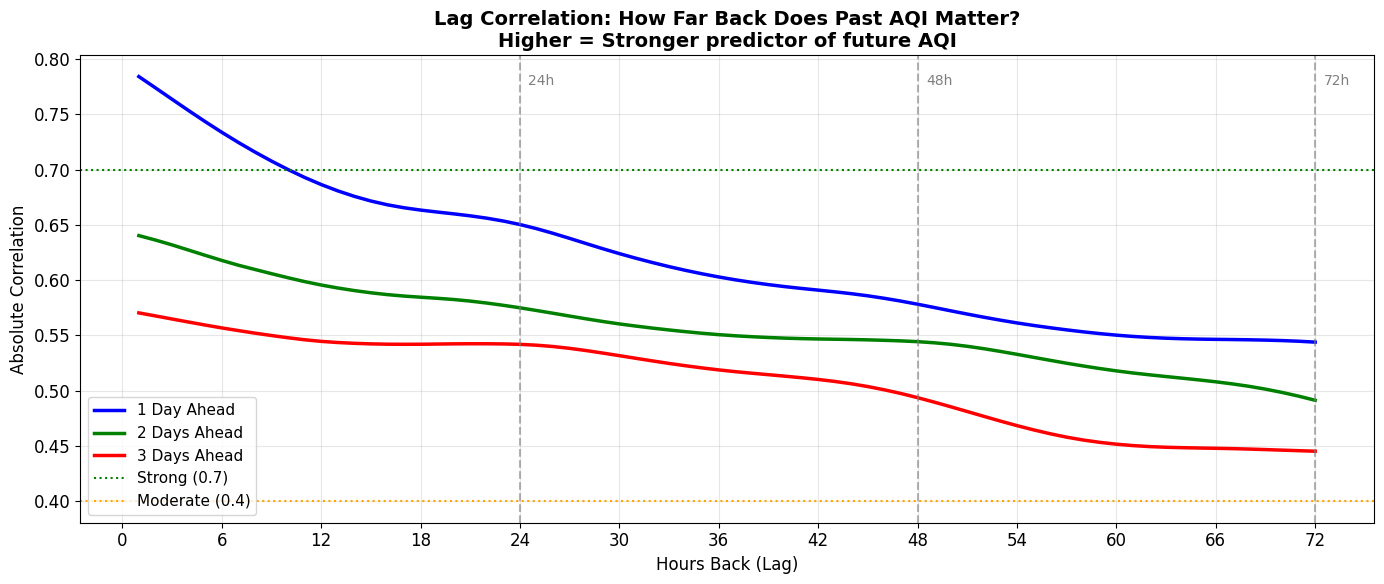


💡 KEY INSIGHTS:
   Best lag for 1-day target: 1h back
   Best lag for 3-day target: 1h back
   → Keep aqi_lag_1h and aqi_lag_1h as features!


In [30]:
# How far back does past AQI affect future AQI?
fig, ax = plt.subplots(figsize=(14, 6))

lag_hours = list(range(1, 73))
corr_1d, corr_2d, corr_3d = [], [], []

for lag in lag_hours:
    lag_series = df['aqi'].shift(lag)

    c1 = df[['target_aqi_1d']].join(
        lag_series.rename('lag')
    ).dropna().corr().iloc[0, 1]

    c2 = df[['target_aqi_2d']].join(
        lag_series.rename('lag')
    ).dropna().corr().iloc[0, 1]

    c3 = df[['target_aqi_3d']].join(
        lag_series.rename('lag')
    ).dropna().corr().iloc[0, 1]

    corr_1d.append(abs(c1))
    corr_2d.append(abs(c2))
    corr_3d.append(abs(c3))

ax.plot(lag_hours, corr_1d, color='blue',
        linewidth=2.5, label='1 Day Ahead')
ax.plot(lag_hours, corr_2d, color='green',
        linewidth=2.5, label='2 Days Ahead')
ax.plot(lag_hours, corr_3d, color='red',
        linewidth=2.5, label='3 Days Ahead')

# Reference lines
for lag in [24, 48, 72]:
    ax.axvline(x=lag, color='gray',
               linestyle='--', alpha=0.6)
    ax.text(lag+0.5, max(corr_1d)*0.99,
            f'{lag}h', fontsize=10, color='gray')

ax.axhline(y=0.7, color='green', linestyle=':',
           linewidth=1.5, label='Strong (0.7)')
ax.axhline(y=0.4, color='orange', linestyle=':',
           linewidth=1.5, label='Moderate (0.4)')

ax.set_title(
    'Lag Correlation: How Far Back Does Past AQI Matter?\n'
    'Higher = Stronger predictor of future AQI',
    fontsize=14, fontweight='bold'
)
ax.set_xlabel('Hours Back (Lag)', fontsize=12)
ax.set_ylabel('Absolute Correlation', fontsize=12)
ax.legend(fontsize=11)
ax.set_xticks(range(0, 73, 6))

plt.tight_layout()
plt.savefig('eda_plots/lag_correlation.png',
            dpi=150, bbox_inches='tight')
plt.show()

best_1d = lag_hours[corr_1d.index(max(corr_1d))]
best_3d = lag_hours[corr_3d.index(max(corr_3d))]

print(f"\n💡 KEY INSIGHTS:")
print(f"   Best lag for 1-day target: {best_1d}h back")
print(f"   Best lag for 3-day target: {best_3d}h back")
print(f"   → Keep aqi_lag_{best_1d}h and aqi_lag_{best_3d}h as features!")

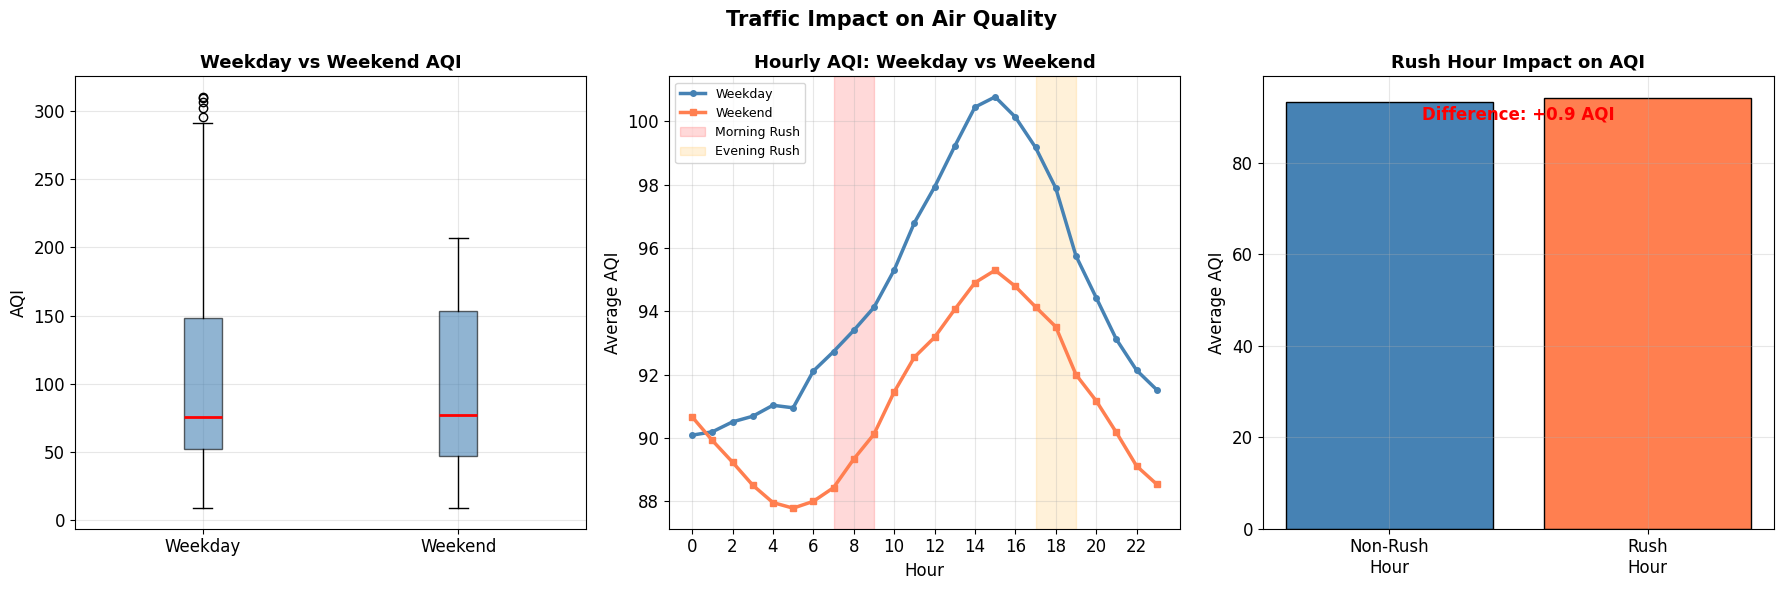


💡 INSIGHTS:
   Weekday avg AQI:  94.6
   Weekend avg AQI:  91.0
   Rush hour avg:    94.3
   Non-rush avg:     93.3
   Rush hour impact: +0.9 AQI points

   ❌ Rush hour NOT significant → Consider dropping!


In [31]:
# Weekend vs Weekday - Does traffic affect AQI?
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Box plot comparison
weekday = df[df['is_weekend'] == 0]['aqi']
weekend = df[df['is_weekend'] == 1]['aqi']

axes[0].boxplot(
    [weekday.dropna(), weekend.dropna()],
    labels=['Weekday', 'Weekend'],
    patch_artist=True,
    boxprops=dict(facecolor='steelblue', alpha=0.6),
    medianprops=dict(color='red', linewidth=2)
)
axes[0].set_title('Weekday vs Weekend AQI',
                  fontsize=13, fontweight='bold')
axes[0].set_ylabel('AQI')

# Hourly pattern split by weekend
hourly_weekday = df[df['is_weekend']==0].groupby('hour')['aqi'].mean()
hourly_weekend = df[df['is_weekend']==1].groupby('hour')['aqi'].mean()

axes[1].plot(hourly_weekday.index, hourly_weekday.values,
             color='steelblue', linewidth=2.5,
             marker='o', markersize=4, label='Weekday')
axes[1].plot(hourly_weekend.index, hourly_weekend.values,
             color='coral', linewidth=2.5,
             marker='s', markersize=4, label='Weekend')

axes[1].axvspan(7, 9, alpha=0.15, color='red',
                label='Morning Rush')
axes[1].axvspan(17, 19, alpha=0.15, color='orange',
                label='Evening Rush')
axes[1].set_title('Hourly AQI: Weekday vs Weekend',
                  fontsize=13, fontweight='bold')
axes[1].set_xlabel('Hour')
axes[1].set_ylabel('Average AQI')
axes[1].set_xticks(range(0, 24, 2))
axes[1].legend(fontsize=9)

# Rush hour comparison
rush = df[df['is_rush_hour'] == 1]['aqi']
non_rush = df[df['is_rush_hour'] == 0]['aqi']

axes[2].bar(
    ['Non-Rush\nHour', 'Rush\nHour'],
    [non_rush.mean(), rush.mean()],
    color=['steelblue', 'coral'],
    edgecolor='black'
)
axes[2].set_title('Rush Hour Impact on AQI',
                  fontsize=13, fontweight='bold')
axes[2].set_ylabel('Average AQI')

diff = rush.mean() - non_rush.mean()
axes[2].text(0.5, max(rush.mean(), non_rush.mean()) * 0.95,
             f'Difference: {diff:+.1f} AQI',
             ha='center', fontsize=12, fontweight='bold',
             color='red' if diff > 0 else 'green')

plt.suptitle('Traffic Impact on Air Quality',
             fontsize=15, fontweight='bold')
plt.tight_layout()
plt.savefig('eda_plots/weekend_vs_weekday.png',
            dpi=150, bbox_inches='tight')
plt.show()

print(f"\n💡 INSIGHTS:")
print(f"   Weekday avg AQI:  {weekday.mean():.1f}")
print(f"   Weekend avg AQI:  {weekend.mean():.1f}")
print(f"   Rush hour avg:    {rush.mean():.1f}")
print(f"   Non-rush avg:     {non_rush.mean():.1f}")
print(f"   Rush hour impact: {diff:+.1f} AQI points")
if abs(diff) > 5:
    print(f"\n   ✅ Rush hour IS significant → Keep is_rush_hour feature!")
else:
    print(f"\n   ❌ Rush hour NOT significant → Consider dropping!")

In [33]:
df

,timestamp,city,aqi,pm25,pm10,o3,no2,so2,co,hour,...,aqi_rolling_std_24h,aqi_rolling_min_24h,aqi_rolling_max_24h,pm25_lag_24h,pm25_change_24h,pm25_rolling_mean_24h,is_aqi_rising,target_aqi_1d,target_aqi_2d,target_aqi_3d
0,2025-08-09 19:00:00,karachi,53.0,12.83,62.90,37.95,0.06,0.30,72.90,19,...,0.707107,53.0,53.0,12.83,0.00,12.830000,0,51.0,42.0,54.0
1,2025-08-09 20:00:00,karachi,52.0,12.79,62.97,37.50,0.07,0.30,71.46,20,...,0.707107,52.0,53.0,12.83,0.00,12.810000,0,48.0,40.0,54.0
2,2025-08-09 21:00:00,karachi,51.0,12.31,60.58,37.33,0.07,0.31,70.27,21,...,1.000000,51.0,53.0,12.83,0.00,12.643333,0,45.0,39.0,54.0
3,2025-08-09 22:00:00,karachi,48.0,11.46,55.81,37.49,0.07,0.31,69.84,22,...,2.160247,48.0,53.0,12.83,0.00,12.347500,0,42.0,38.0,54.0
4,2025-08-09 23:00:00,karachi,45.0,10.71,51.12,37.68,0.07,0.31,69.21,23,...,3.271085,45.0,53.0,12.83,0.00,12.020000,0,40.0,40.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,2026-02-02 14:00:00,karachi,192.0,134.99,297.89,173.04,3.26,11.93,588.30,14,...,54.933952,36.0,192.0,28.36,106.63,40.897083,1,180.0,165.0,161.0
4196,2026-02-02 15:00:00,karachi,195.0,141.55,301.67,187.49,2.70,11.99,605.45,15,...,58.743717,36.0,195.0,31.81,109.74,45.469583,1,181.0,0.0,162.0
4197,2026-02-02 16:00:00,karachi,197.0,145.30,300.54,196.73,2.49,11.70,617.04,16,...,62.150457,36.0,197.0,32.09,113.21,50.186667,1,182.0,166.0,163.0
4198,2026-02-02 17:00:00,karachi,197.0,144.72,293.76,201.17,2.58,11.41,616.98,17,...,65.015034,36.0,197.0,29.40,115.32,54.991667,0,182.0,166.0,164.0


In [35]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   timestamp              4200 non-null   datetime64[us]
 1   city                   4200 non-null   str           
 2   aqi                    4200 non-null   float64       
 3   pm25                   4200 non-null   float64       
 4   pm10                   4200 non-null   float64       
 5   o3                     4200 non-null   float64       
 6   no2                    4200 non-null   float64       
 7   so2                    4200 non-null   float64       
 8   co                     4200 non-null   float64       
 9   hour                   4200 non-null   int64         
 10  day_of_week            4200 non-null   int64         
 11  month                  4200 non-null   int64         
 12  day                    4200 non-null   int64         
 13  is_weekend    